-------------------------------------------------------------------------------------------------------------
<b>TITLE : SPRINGBOARD CAPSTONE PROJECT (2019)</b>

<b>AUTHOR : Alisha Antony</b>

<b>PROJECT : Chicago Taxi Trips - Tips Prediction</b>

<b>DATA : Data downloaded from Kaggle in csv format. 12 .csv files are used, each file with the taxi trips data of each month.</b>

<b>OBJECTIVE : Given the data of each taxi rides of 2016 in Chicago, the task is to: Use machine learning technique to build a model to predict the tips provided for each ride.</b>

-------------------------------------------------------------------------------------------------------------

## STEP 1: IMPORTING IMPORTANT PACKAGES

In [2]:
#IMPORTING NECESSARY PACKAGES AND CHECKING THEIR VERSIONS

# Python version
import sys
print('Python: {}'.format(sys.version))

# numpy -package for scientific computing with Python
import numpy as np 
print('numpy: {}'.format(np.__version__))

# pandas -provide high-performance, easy-to-use data structures and data analysis tools
import pandas as pd 
print('pandas: {}'.format(pd.__version__))

# seaborn -for making attractive and informative statistical graphics in Python
import seaborn as sns 
print('seaborn: {}'.format(sns.__version__))

# matplotlib -Python 2D plotting library
import matplotlib as mp
print('matplotlib: {}'.format(mp.__version__))
import matplotlib.pyplot as plt 


# scipy -provides essential numerical routines
import scipy as sc
print('scipy: {}'.format(sc.__version__))

# stats -contains probability distributions as well as a growing library of statistical functions
from scipy.stats import norm #A normal continuous random variable.

# sklearn - features various classification, regression and clustering algorithms
import sklearn as sk
print('sklearn: {}'.format(sk.__version__))
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import metrics, datasets, linear_model 
from sklearn.metrics import mean_squared_error, r2_score

# yellowbrick - suite of visual analysis and diagnostic tools designed to facilitate machine learning with scikit-learn.
import yellowbrick as yb
print('yellowbrick: {}'.format(yb.__version__))

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError

# pylab - bulk imports matplotlib.pyplot(for plotting) and NumPy(for Mathematics and working with arrays) in a single name space
from pylab import rcParams

#To see the plots inline,use below code:
%matplotlib inline

Python: 3.7.4 (default, Aug 13 2019, 15:17:50) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
numpy: 1.17.2
pandas: 0.25.1
seaborn: 0.9.0
matplotlib: 3.1.1
scipy: 1.3.1
sklearn: 0.21.3
yellowbrick: 1.0.1


## STEP 2 : LOADING DATA FROM CSV FILE

In [6]:
# Checking the current directory

In [7]:
pwd

'/Users/Godfather/Documents/Data Science'

In [8]:
# Changing the directory

In [9]:
cd /Users/Godfather/Documents/Data Science/Projects/Chicago taxi trips/20190729 Chicago taxi trips/2. Prepared Data/chicago-taxi-rides-2016/

/Users/Godfather/Documents/Data Science/Projects/Chicago taxi trips/20190729 Chicago taxi trips/2. Prepared Data/chicago-taxi-rides-2016


In [10]:
# Loading all the 12 datasets (.csv files)

taxi_trip_Jan = pd.read_csv('chicago_taxi_trips_2016_01.csv')
taxi_trip_Feb = pd.read_csv('chicago_taxi_trips_2016_02.csv')
taxi_trip_Mar = pd.read_csv('chicago_taxi_trips_2016_03.csv')
taxi_trip_Apr = pd.read_csv('chicago_taxi_trips_2016_04.csv')
taxi_trip_May = pd.read_csv('chicago_taxi_trips_2016_05.csv')
taxi_trip_Jun = pd.read_csv('chicago_taxi_trips_2016_06.csv')
taxi_trip_Jul = pd.read_csv('chicago_taxi_trips_2016_07.csv')
taxi_trip_Aug = pd.read_csv('chicago_taxi_trips_2016_08.csv')
taxi_trip_Sep = pd.read_csv('chicago_taxi_trips_2016_09.csv')
taxi_trip_Oct = pd.read_csv('chicago_taxi_trips_2016_10.csv')
taxi_trip_Nov = pd.read_csv('chicago_taxi_trips_2016_11.csv')
taxi_trip_Dec = pd.read_csv('chicago_taxi_trips_2016_12.csv')


## STEP 3: PREPROCESSING AND EXPLORATORY DATA ANALYSIS(EDA) --- Exploring Data using various methods

In [11]:
# Viewing Data of 1 csv file to understand the data

taxi_trip_Jan


#we can see our data as output 

,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,85.0,2016-1-13 06:15:00,2016-1-13 06:15:00,180.0,0.40,NaN,NaN,24.0,24.0,4.50,0.00,0.0,0.0,4.50,Cash,107.0,199.0,510.0,199.0,510.0
1,2776.0,2016-1-22 09:30:00,2016-1-22 09:45:00,240.0,0.70,NaN,NaN,NaN,NaN,4.45,4.45,0.0,0.0,8.90,Credit Card,NaN,NaN,NaN,NaN,NaN
2,3168.0,2016-1-31 21:30:00,2016-1-31 21:30:00,0.0,0.00,NaN,NaN,NaN,NaN,42.75,5.00,0.0,0.0,47.75,Credit Card,119.0,NaN,NaN,NaN,NaN
3,4237.0,2016-1-23 17:30:00,2016-1-23 17:30:00,480.0,1.10,NaN,NaN,6.0,6.0,7.00,0.00,0.0,0.0,7.00,Cash,NaN,686.0,500.0,686.0,500.0
4,5710.0,2016-1-14 05:45:00,2016-1-14 06:00:00,480.0,2.71,NaN,NaN,32.0,NaN,10.25,0.00,0.0,0.0,10.25,Cash,NaN,385.0,478.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705800,1279.0,2016-1-30 19:30:00,2016-1-30 19:45:00,840.0,2.40,NaN,NaN,22.0,7.0,10.25,0.00,0.0,0.0,10.25,Cash,82.0,604.0,668.0,173.0,203.0
1705801,8112.0,2016-1-28 17:45:00,2016-1-28 17:45:00,0.0,0.00,NaN,NaN,NaN,NaN,45.25,9.05,0.0,0.0,54.30,Credit Card,119.0,NaN,NaN,NaN,NaN
1705802,1213.0,2016-1-28 06:30:00,2016-1-28 06:45:00,1380.0,17.90,NaN,313.0,32.0,76.0,44.00,5.00,0.0,0.0,49.00,Credit Card,92.0,64.0,231.0,225.0,6.0
1705803,1911.0,2016-1-17 12:30:00,2016-1-17 12:45:00,960.0,2.50,NaN,807.0,8.0,28.0,11.75,0.00,0.0,1.0,12.75,Cash,NaN,161.0,649.0,411.0,545.0


In [15]:
#Listing More Information about given data

#Dimensions Of Data
print("DIMENSIONS:\n")
print ('Taxi trip of January has {} rows and {} columns'.format(taxi_trip_Jan.shape[0],taxi_trip_Jan.shape[1]))
print ('Taxi trip of February has {} rows and {} columns'.format(taxi_trip_Feb.shape[0],taxi_trip_Feb.shape[1]))
print ('Taxi trip of March has {} rows and {} columns'.format(taxi_trip_Mar.shape[0],taxi_trip_Mar.shape[1]))
print ('Taxi trip of April has {} rows and {} columns'.format(taxi_trip_Apr.shape[0],taxi_trip_Apr.shape[1]))
print ('Taxi trip of May has {} rows and {} columns'.format(taxi_trip_May.shape[0],taxi_trip_May.shape[1]))
print ('Taxi trip of June has {} rows and {} columns'.format(taxi_trip_Jun.shape[0],taxi_trip_Jun.shape[1]))
print ('Taxi trip of July has {} rows and {} columns'.format(taxi_trip_Jul.shape[0],taxi_trip_Jul.shape[1]))
print ('Taxi trip of August has {} rows and {} columns'.format(taxi_trip_Aug.shape[0],taxi_trip_Aug.shape[1]))
print ('Taxi trip of September has {} rows and {} columns'.format(taxi_trip_Sep.shape[0],taxi_trip_Sep.shape[1]))
print ('Taxi trip of October has {} rows and {} columns'.format(taxi_trip_Oct.shape[0],taxi_trip_Oct.shape[1]))
print ('Taxi trip of November has {} rows and {} columns'.format(taxi_trip_Nov.shape[0],taxi_trip_Nov.shape[1]))
print ('Taxi trip of Dec has {} rows and {} columns'.format(taxi_trip_Dec.shape[0],taxi_trip_Dec.shape[1]))

#Information about Data 
print("\nTAXI TRIPS DATA INFORMATION:")
print("\nJanuary:")
print(taxi_trip_Jan.info())

print("\nFebruary:")
print(taxi_trip_Feb.info())

print("\nMarch:")
print(taxi_trip_Mar.info())

print("\nApril:")
print(taxi_trip_Apr.info())

print("\nMay:")
print(taxi_trip_May.info())

print("\nJune:")
print(taxi_trip_Jun.info())

print("\nJuly:")
print(taxi_trip_Jul.info())

print("\nAugust:")
print(taxi_trip_Aug.info())

print("\nSeptember:")
print(taxi_trip_Sep.info())

print("\nOctober:")
print(taxi_trip_Oct.info())

print("\nNovember:")
print(taxi_trip_Nov.info())

print("\nDecember:")
print(taxi_trip_Dec.info())

#Datatypes (All the 12 csv files have the same data types for all the variables, hence displaying info of 1 csv file)
print("\n\nDATA TYPE INFORMATION:")
taxi_trip_Jan.dtypes


DIMENSIONS:

Taxi trip of January has 1705805 rows and 20 columns
Taxi trip of February has 1751192 rows and 20 columns
Taxi trip of March has 1975108 rows and 20 columns
Taxi trip of April has 1952152 rows and 20 columns
Taxi trip of May has 1943584 rows and 20 columns
Taxi trip of June has 1934479 rows and 20 columns
Taxi trip of July has 1745387 rows and 20 columns
Taxi trip of August has 1523947 rows and 20 columns
Taxi trip of September has 1294020 rows and 20 columns
Taxi trip of October has 1499771 rows and 20 columns
Taxi trip of November has 1295000 rows and 20 columns
Taxi trip of Dec has 1245712 rows and 20 columns

TAXI TRIPS DATA INFORMATION:

January:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705805 entries, 0 to 1705804
Data columns (total 20 columns):
taxi_id                   float64
trip_start_timestamp      object
trip_end_timestamp        object
trip_seconds              float64
trip_miles                float64
pickup_census_tract       float64
dropoff_cen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499771 entries, 0 to 1499770
Data columns (total 20 columns):
taxi_id                   1499330 non-null float64
trip_start_timestamp      1499771 non-null object
trip_end_timestamp        1499694 non-null object
trip_seconds              1499683 non-null float64
trip_miles                1499731 non-null float64
pickup_census_tract       0 non-null float64
dropoff_census_tract      962585 non-null float64
pickup_community_area     1359987 non-null float64
dropoff_community_area    1328872 non-null float64
fare                      1499728 non-null float64
tips                      1499728 non-null float64
tolls                     1499728 non-null float64
extras                    1499728 non-null float64
trip_total                1499728 non-null float64
payment_type              1499771 non-null object
company                   865024 non-null float64
pickup_latitude           1360028 non-null float64
pickup_longitude          13600

taxi_id                   float64
trip_start_timestamp       object
trip_end_timestamp         object
trip_seconds              float64
trip_miles                float64
pickup_census_tract       float64
dropoff_census_tract      float64
pickup_community_area     float64
dropoff_community_area    float64
fare                      float64
tips                      float64
tolls                     float64
extras                    float64
trip_total                float64
payment_type               object
company                   float64
pickup_latitude           float64
pickup_longitude          float64
dropoff_latitude          float64
dropoff_longitude         float64
dtype: object

In [16]:
#List Column Names (All the 12 csv files have the same column names, hence displaying info of 1 csv file)

taxi_trip_Jan.columns

Index(['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds',
       'trip_miles', 'pickup_census_tract', 'dropoff_census_tract',
       'pickup_community_area', 'dropoff_community_area', 'fare', 'tips',
       'tolls', 'extras', 'trip_total', 'payment_type', 'company',
       'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
       'dropoff_longitude'],
      dtype='object')

In [17]:
# Statistical Summary for the month of January

Jan_data = taxi_trip_Jan.describe()
print(Jan_data)

            taxi_id  trip_seconds    trip_miles  pickup_census_tract  \
count  1.705782e+06  1.705491e+06  1.705791e+06                  0.0   
mean   4.389323e+03  6.534422e+02  2.872702e+00                  NaN   
std    2.515819e+03  9.327260e+02  1.810793e+01                  NaN   
min    0.000000e+00  0.000000e+00  0.000000e+00                  NaN   
25%    2.242000e+03  2.400000e+02  0.000000e+00                  NaN   
50%    4.386000e+03  4.800000e+02  1.000000e+00                  NaN   
75%    6.591000e+03  8.400000e+02  2.400000e+00                  NaN   
max    8.762000e+03  8.634000e+04  3.280000e+03                  NaN   

       dropoff_census_tract  pickup_community_area  dropoff_community_area  \
count         967479.000000           1.420016e+06            1.392150e+06   
mean             516.822016           2.322074e+01            2.099069e+01   
std              357.586612           1.981936e+01            1.737237e+01   
min                2.000000           1

In [32]:
# Inspect the first 5 rows of data for 1 month

first = taxi_trip_Jan.head()
print("FIRST FIVE ROWS :- ")
print(first)

# Inspect the last 5 rows of data for 1 month

last = taxi_trip_Jan.tail()
print("\nLAST FIVE ROWS :- ")
print(last)

FIRST FIVE ROWS :- 
   taxi_id trip_start_timestamp  trip_end_timestamp  trip_seconds  trip_miles  \
0     85.0   2016-1-13 06:15:00  2016-1-13 06:15:00         180.0        0.40   
1   2776.0   2016-1-22 09:30:00  2016-1-22 09:45:00         240.0        0.70   
2   3168.0   2016-1-31 21:30:00  2016-1-31 21:30:00           0.0        0.00   
3   4237.0   2016-1-23 17:30:00  2016-1-23 17:30:00         480.0        1.10   
4   5710.0   2016-1-14 05:45:00  2016-1-14 06:00:00         480.0        2.71   

   pickup_census_tract  dropoff_census_tract  pickup_community_area  \
0                  NaN                   NaN                   24.0   
1                  NaN                   NaN                    NaN   
2                  NaN                   NaN                    NaN   
3                  NaN                   NaN                    6.0   
4                  NaN                   NaN                   32.0   

   dropoff_community_area   fare  tips  tolls  extras  trip_total 

<b>HANDLING MISSING VALUES IN DATA</b>

The concept of missing values is important to understand in order to successfully manage data. If the missing values are not handled properly, then we may end up drawing an inaccurate inference about the data. Due to improper handling, the result obtained by us will differ from ones where the missing values are present.

Therefore, missing values should be handled properly.

In [33]:
# Finding null values using apply function

taxi_trip_Jan.apply(lambda x: sum(x.isnull()),axis=0) 

taxi_id                        23
trip_start_timestamp            0
trip_end_timestamp            125
trip_seconds                  314
trip_miles                     14
pickup_census_tract       1705805
dropoff_census_tract       738326
pickup_community_area      285789
dropoff_community_area     313655
fare                           33
tips                           33
tolls                          33
extras                         33
trip_total                     33
payment_type                    0
company                    632726
pickup_latitude            285757
pickup_longitude           285757
dropoff_latitude           311682
dropoff_longitude          311682
dtype: int64

In [34]:
taxi_trip_Feb.apply(lambda x: sum(x.isnull()),axis=0) 

taxi_id                        41
trip_start_timestamp            0
trip_end_timestamp             99
trip_seconds                  156
trip_miles                      3
pickup_census_tract       1751192
dropoff_census_tract       731666
pickup_community_area      296773
dropoff_community_area     324402
fare                           10
tips                           10
tolls                          10
extras                         10
trip_total                     10
payment_type                    0
company                    645247
pickup_latitude            296737
pickup_longitude           296737
dropoff_latitude           322088
dropoff_longitude          322088
dtype: int64

In [35]:
taxi_trip_Mar.apply(lambda x: sum(x.isnull()),axis=0) 

taxi_id                        29
trip_start_timestamp            0
trip_end_timestamp            341
trip_seconds                  451
trip_miles                      4
pickup_census_tract       1975108
dropoff_census_tract       798674
pickup_community_area      336987
dropoff_community_area     368704
fare                           14
tips                           14
tolls                          14
extras                         14
trip_total                     14
payment_type                    0
company                    719299
pickup_latitude            336972
pickup_longitude           336972
dropoff_latitude           365980
dropoff_longitude          365980
dtype: int64

In [36]:
taxi_trip_Apr.apply(lambda x: sum(x.isnull()),axis=0) 

taxi_id                        29
trip_start_timestamp            0
trip_end_timestamp           1075
trip_seconds                 1099
trip_miles                     11
pickup_census_tract       1952152
dropoff_census_tract       784427
pickup_community_area      330484
dropoff_community_area     366424
fare                           19
tips                           19
tolls                          19
extras                         19
trip_total                     19
payment_type                    0
company                    705980
pickup_latitude            330442
pickup_longitude           330442
dropoff_latitude           362639
dropoff_longitude          362639
dtype: int64

In [37]:
taxi_trip_May.apply(lambda x: sum(x.isnull()),axis=0) 

taxi_id                        16
trip_start_timestamp            0
trip_end_timestamp             76
trip_seconds                  101
trip_miles                     15
pickup_census_tract       1943584
dropoff_census_tract       780770
pickup_community_area      321410
dropoff_community_area     356179
fare                           18
tips                           18
tolls                          18
extras                         18
trip_total                     18
payment_type                    0
company                    697478
pickup_latitude            321376
pickup_longitude           321376
dropoff_latitude           352026
dropoff_longitude          352026
dtype: int64

In [38]:
taxi_trip_Jun.apply(lambda x: sum(x.isnull()),axis=0) 

taxi_id                        16
trip_start_timestamp            0
trip_end_timestamp            190
trip_seconds                  206
trip_miles                     27
pickup_census_tract       1934479
dropoff_census_tract       742936
pickup_community_area      308895
dropoff_community_area     335767
fare                           35
tips                           35
tolls                          35
extras                         35
trip_total                     35
payment_type                    0
company                    716242
pickup_latitude            308877
pickup_longitude           308877
dropoff_latitude           330932
dropoff_longitude          330932
dtype: int64

In [39]:
taxi_trip_Jul.apply(lambda x: sum(x.isnull()),axis=0) 

taxi_id                       362
trip_start_timestamp            0
trip_end_timestamp             68
trip_seconds                   99
trip_miles                     32
pickup_census_tract       1745387
dropoff_census_tract       658901
pickup_community_area      240581
dropoff_community_area     254129
fare                           35
tips                           35
tolls                          35
extras                         35
trip_total                     35
payment_type                    0
company                    695142
pickup_latitude            240564
pickup_longitude           240564
dropoff_latitude           250717
dropoff_longitude          250717
dtype: int64

In [40]:
taxi_trip_Aug.apply(lambda x: sum(x.isnull()),axis=0) 

taxi_id                       412
trip_start_timestamp            0
trip_end_timestamp             65
trip_seconds                   87
trip_miles                     26
pickup_census_tract       1523947
dropoff_census_tract       555963
pickup_community_area      150211
dropoff_community_area     177236
fare                           26
tips                           26
tolls                          26
extras                         26
trip_total                     26
payment_type                    0
company                    604779
pickup_latitude            150196
pickup_longitude           150196
dropoff_latitude           174204
dropoff_longitude          174204
dtype: int64

In [41]:
taxi_trip_Sep.apply(lambda x: sum(x.isnull()),axis=0) 

taxi_id                       399
trip_start_timestamp            0
trip_end_timestamp             65
trip_seconds                   80
trip_miles                     25
pickup_census_tract       1294020
dropoff_census_tract       479110
pickup_community_area      112582
dropoff_community_area     139037
fare                           27
tips                           27
tolls                          27
extras                         27
trip_total                     27
payment_type                    0
company                    441271
pickup_latitude            112539
pickup_longitude           112539
dropoff_latitude           135577
dropoff_longitude          135577
dtype: int64

In [42]:
taxi_trip_Oct.apply(lambda x: sum(x.isnull()),axis=0) 

taxi_id                       441
trip_start_timestamp            0
trip_end_timestamp             77
trip_seconds                   88
trip_miles                     40
pickup_census_tract       1499771
dropoff_census_tract       537186
pickup_community_area      139784
dropoff_community_area     170899
fare                           43
tips                           43
tolls                          43
extras                         43
trip_total                     43
payment_type                    0
company                    634747
pickup_latitude            139743
pickup_longitude           139743
dropoff_latitude           167193
dropoff_longitude          167193
dtype: int64

In [43]:
taxi_trip_Nov.apply(lambda x: sum(x.isnull()),axis=0) 

taxi_id                       547
trip_start_timestamp            0
trip_end_timestamp            150
trip_seconds                  436
trip_miles                     13
pickup_census_tract       1295000
dropoff_census_tract       468425
pickup_community_area      118133
dropoff_community_area     145807
fare                           17
tips                           17
tolls                          17
extras                         17
trip_total                     17
payment_type                    0
company                    568576
pickup_latitude            118053
pickup_longitude           118053
dropoff_latitude           142162
dropoff_longitude          142162
dtype: int64

In [44]:
taxi_trip_Dec.apply(lambda x: sum(x.isnull()),axis=0) 

taxi_id                       618
trip_start_timestamp            0
trip_end_timestamp             82
trip_seconds                   98
trip_miles                     22
pickup_census_tract       1245712
dropoff_census_tract       458470
pickup_community_area      114351
dropoff_community_area     133811
fare                           23
tips                           23
tolls                          23
extras                         23
trip_total                     23
payment_type                    0
company                    574407
pickup_latitude            114344
pickup_longitude           114344
dropoff_latitude           132462
dropoff_longitude          132462
dtype: int64

In [45]:
# Cleaning the dataset (removing NaN values and the column pickup_census_tract as it has all the values as 0)

Jan = taxi_trip_Jan.dropna(how='any', subset=['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds', 'trip_miles', 'dropoff_census_tract', 'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'company', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])
Jan = Jan.drop(['pickup_census_tract'], axis=1)

Feb = taxi_trip_Feb.dropna(how='any', subset=['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds', 'trip_miles', 'dropoff_census_tract', 'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'company', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])
Feb = Feb.drop(['pickup_census_tract'], axis=1)

Mar = taxi_trip_Mar.dropna(how='any', subset=['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds', 'trip_miles', 'dropoff_census_tract', 'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'company', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])
Mar = Mar.drop(['pickup_census_tract'], axis=1)

Apr = taxi_trip_Apr.dropna(how='any', subset=['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds', 'trip_miles', 'dropoff_census_tract', 'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'company', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])
Apr = Apr.drop(['pickup_census_tract'], axis=1)

May = taxi_trip_May.dropna(how='any', subset=['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds', 'trip_miles', 'dropoff_census_tract', 'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'company', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])
May = May.drop(['pickup_census_tract'], axis=1)

Jun = taxi_trip_Jun.dropna(how='any', subset=['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds', 'trip_miles', 'dropoff_census_tract', 'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'company', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])
Jun = Jun.drop(['pickup_census_tract'], axis=1)

Jul = taxi_trip_Jul.dropna(how='any', subset=['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds', 'trip_miles', 'dropoff_census_tract', 'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'company', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])
Jul = Jul.drop(['pickup_census_tract'], axis=1)

Aug = taxi_trip_Aug.dropna(how='any', subset=['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds', 'trip_miles', 'dropoff_census_tract', 'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'company', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])
Aug = Aug.drop(['pickup_census_tract'], axis=1)

Sep = taxi_trip_Sep.dropna(how='any', subset=['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds', 'trip_miles', 'dropoff_census_tract', 'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'company', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])
Sep = Sep.drop(['pickup_census_tract'], axis=1)

Oct = taxi_trip_Oct.dropna(how='any', subset=['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds', 'trip_miles', 'dropoff_census_tract', 'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'company', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])
Oct = Oct.drop(['pickup_census_tract'], axis=1)

Nov = taxi_trip_Nov.dropna(how='any', subset=['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds', 'trip_miles', 'dropoff_census_tract', 'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'company', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])
Nov = Nov.drop(['pickup_census_tract'], axis=1)

Dec = taxi_trip_Dec.dropna(how='any', subset=['taxi_id', 'trip_start_timestamp', 'trip_end_timestamp', 'trip_seconds', 'trip_miles', 'dropoff_census_tract', 'pickup_community_area', 'dropoff_community_area', 'fare', 'tips', 'tolls', 'extras', 'trip_total', 'company', 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])
Dec = Dec.drop(['pickup_census_tract'], axis=1)

In [46]:
print("=========No. of row count for each variable in Jan===============\n")
print(Jan.count())

print("\n=========No. of row count for each variable in Feb=========\n")
print(Feb.count())

print("\n=========No. of row count for each variable in Mar=========\n")
print(Mar.count())

print("\n=========No. of row count for each variable in Apr=========\n")
print(Apr.count())

print("\n=========No. of row count for each variable in May=========\n")
print(May.count())

print("\n=========No. of row count for each variable in Jun=========\n")
print(Jun.count())

print("\n=========No. of row count for each variable in Jul=========\n")
print(Jul.count())

print("\n=========No. of row count for each variable in Aug=========\n")
print(Aug.count())

print("\n=========No. of row count for each variable in Sep=========\n")
print(Sep.count())

print("\n=========No. of row count for each variable in Oct=========\n")
print(Oct.count())

print("\n=========No. of row count for each variable in Nov=========\n")
print(Nov.count())

print("\n=========No. of row count for each variable in Dec=========\n")
print(Dec.count())



=========No. of row count for each variable in Jan===============

taxi_id                   615075
trip_start_timestamp      615075
trip_end_timestamp        615075
trip_seconds              615075
trip_miles                615075
dropoff_census_tract      615075
pickup_community_area     615075
dropoff_community_area    615075
fare                      615075
tips                      615075
tolls                     615075
extras                    615075
trip_total                615075
payment_type              615075
company                   615075
pickup_latitude           615075
pickup_longitude          615075
dropoff_latitude          615075
dropoff_longitude         615075
dtype: int64

=========No. of row count for each variable in Feb=========

taxi_id                   646037
trip_start_timestamp      646037
trip_end_timestamp        646037
trip_seconds              646037
trip_miles                646037
dropoff_census_tract      646037
pickup_community_area     646037


In [50]:
print("=========Null Values in January===============\n")
Jan.apply(lambda x: sum(x.isnull()),axis=0) 

print("=========Null Values in February===============\n")
Feb.apply(lambda x: sum(x.isnull()),axis=0) 

print("=========Null Values in March===============\n")
Mar.apply(lambda x: sum(x.isnull()),axis=0) 

print("=========Null Values in April===============\n")
Apr.apply(lambda x: sum(x.isnull()),axis=0) 

print("=========Null Values in May===============\n")
May.apply(lambda x: sum(x.isnull()),axis=0) 

print("=========Null Values in June===============\n")
Jun.apply(lambda x: sum(x.isnull()),axis=0) 

print("=========Null Values in July===============\n")
Jul.apply(lambda x: sum(x.isnull()),axis=0) 

print("=========Null Values in August===============\n")
Aug.apply(lambda x: sum(x.isnull()),axis=0) 

print("=========Null Values in September===============\n")
Sep.apply(lambda x: sum(x.isnull()),axis=0) 

print("=========Null Values in October===============\n")
Oct.apply(lambda x: sum(x.isnull()),axis=0) 

print("=========Null Values in November===============\n")
Nov.apply(lambda x: sum(x.isnull()),axis=0) 

print("=========Null Values in December===============\n")
Dec.apply(lambda x: sum(x.isnull()),axis=0) 

=========Null Values in January===============

=========Null Values in February===============

=========Null Values in March===============

=========Null Values in April===============

=========Null Values in May===============

=========Null Values in June===============

=========Null Values in July===============

=========Null Values in August===============

=========Null Values in September===============

=========Null Values in October===============

=========Null Values in November===============

=========Null Values in December===============



taxi_id                   0
trip_start_timestamp      0
trip_end_timestamp        0
trip_seconds              0
trip_miles                0
dropoff_census_tract      0
pickup_community_area     0
dropoff_community_area    0
fare                      0
tips                      0
tolls                     0
extras                    0
trip_total                0
payment_type              0
company                   0
pickup_latitude           0
pickup_longitude          0
dropoff_latitude          0
dropoff_longitude         0
dtype: int64

<b> Combining all the 12 datasets for further analysis </b>

In [56]:
# Combining all the 12 datasets
taxi_trips_2016 = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec], axis=0)

# Checking the total number of rows and columns
taxi_trips_2016.shape

(7564042, 19)

In [94]:
# Seperating out the Categorical and Numerical features

numerical_feature=taxi_trips_2016.dtypes[taxi_trips_2016.dtypes!= 'object'].index
categorical_feature=taxi_trips_2016.dtypes[taxi_trips_2016.dtypes== 'object'].index

taxi_trips_2016_num = taxi_trips_2016[['tips','fare','trip_seconds','trip_miles','pickup_community_area','trip_total','dropoff_community_area','extras','company','taxi_id','tolls','dropoff_census_tract','dropoff_latitude','pickup_latitude','dropoff_longitude','pickup_longitude']]
taxi_trips_2016_cat = taxi_trips_2016[['trip_start_timestamp','trip_end_timestamp','payment_type']]

# Printing total number of numeric and categorical columns

print ("There are {} numeric and {} categorical variables in all the 12 datasets".format(numerical_feature.shape[0],
                                                                                categorical_feature.shape[0]))

print("\nNUMERIC VARIABLES ARE:{}\n".format(taxi_trips_2016_num.columns.values))
print("")
print("CATEGORICAL VARIABLES ARE:{}\n".format(taxi_trips_2016_cat.columns.values))


There are 16 numeric and 3 categorical variables in all the 12 datasets

NUMERIC VARIABLES ARE:['tips' 'fare' 'trip_seconds' 'trip_miles' 'pickup_community_area'
 'trip_total' 'dropoff_community_area' 'extras' 'company' 'taxi_id'
 'tolls' 'dropoff_census_tract' 'dropoff_latitude' 'pickup_latitude'
 'dropoff_longitude' 'pickup_longitude']


CATEGORICAL VARIABLES ARE:['trip_start_timestamp' 'trip_end_timestamp' 'payment_type']



In [77]:
#Defining Function to seggregate the top absolute correlations

def get_redundant_pairs(taxi_trips_2016_num):
    
    pairs_to_drop = set()
    cols = taxi_trips_2016_num.columns
    for i in range(0, taxi_trips_2016_num.shape[1]):   #for loop to iterate through all columns
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

print("\nTop Absolute Correlations:\n")

#Calling Function

print(get_top_abs_correlations(taxi_trips_2016_num,90))



Top Absolute Correlations:

trip_total              extras              0.890635
fare                    trip_seconds        0.850960
                        trip_miles          0.640289
tips                    fare                0.618485
trip_seconds            trip_miles          0.559521
                                              ...   
dropoff_community_area  extras              0.003179
company                 taxi_id             0.003152
tolls                   pickup_longitude    0.002981
trip_seconds            tolls               0.002803
dropoff_community_area  tolls               0.002717
Length: 90, dtype: float64


<b>TARGET VARIABLE</b>

In our Dataset,we have a target variable ('tips') which referes to the tips provided.Our goal is to predict the tips

The skewness of target is 7.123919535177937


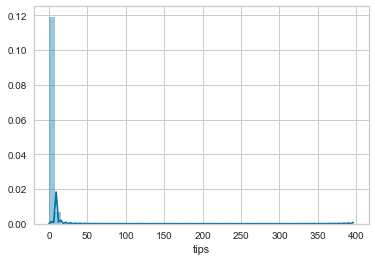

In [57]:
# Check for skewness: Plot a histogram of target feature ('tips')

#plt.figure(figsize=(15,10))
#plt.tight_layout()
sns.distplot(taxi_trips_2016['tips']) #using seaborn package and its function named distplot

# calculate skewness of target feature

print ("The skewness of target is {}".format(taxi_trips_2016['tips'].skew()))

#plotting using matplotlib.pyplot alias - plt

plt.show()

<b>Analysis:</b>

Skewness in statistics represents an imbalance and an asymmetry from the mean of a data distribution. In a normal data distribution with a symmetrical bell curve, the mean and median are the same. In a skewed data distribution, the median and the mean are different values.

If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

As the skewness is 7.12, we can say that the distribution here is highly skewed.

In [59]:
# Some infromation about target variable

# Summary Statistics
print("Summary statistics of Target Variable :- ")
print(taxi_trips_2016['tips'].describe())
print("")

# Target distribution
print("Distribution of Target Variable :- ")
print(taxi_trips_2016.groupby('tips').size()) 
print("datatype:")
print(taxi_trips_2016['tips'].dtypes)
print("")


Summary statistics of Target Variable :- 
count    7.564042e+06
mean     1.536023e+00
std      2.636438e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.000000e+00
max      3.960000e+02
Name: tips, dtype: float64

Distribution of Target Variable :- 
tips
0.00      4156429
0.01         4308
0.02         2759
0.03          742
0.04          367
           ...   
300.00          1
310.00          1
350.00          1
395.00          3
396.00          2
Length: 1635, dtype: int64
datatype:
float64



<b>CHECKING CORRELATION</b>

Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases. A correlation coefficient is a statistical measure of the degree to which changes to the value of one variable predict change to the value of another.

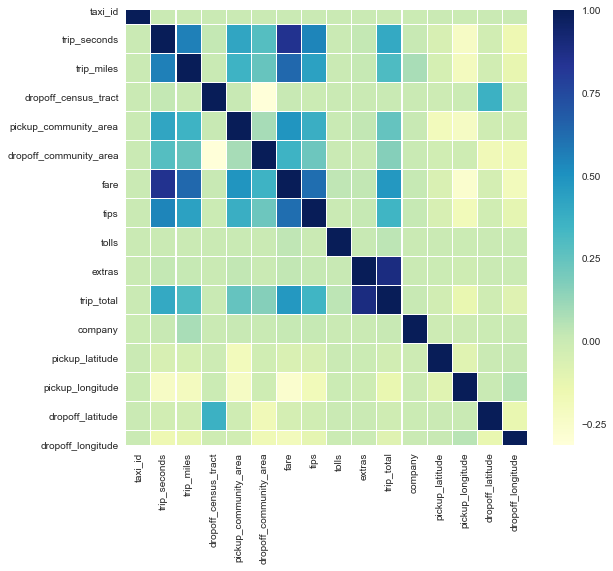

In [60]:
#Correlation Marix

corrmat = taxi_trips_2016.corr() 

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

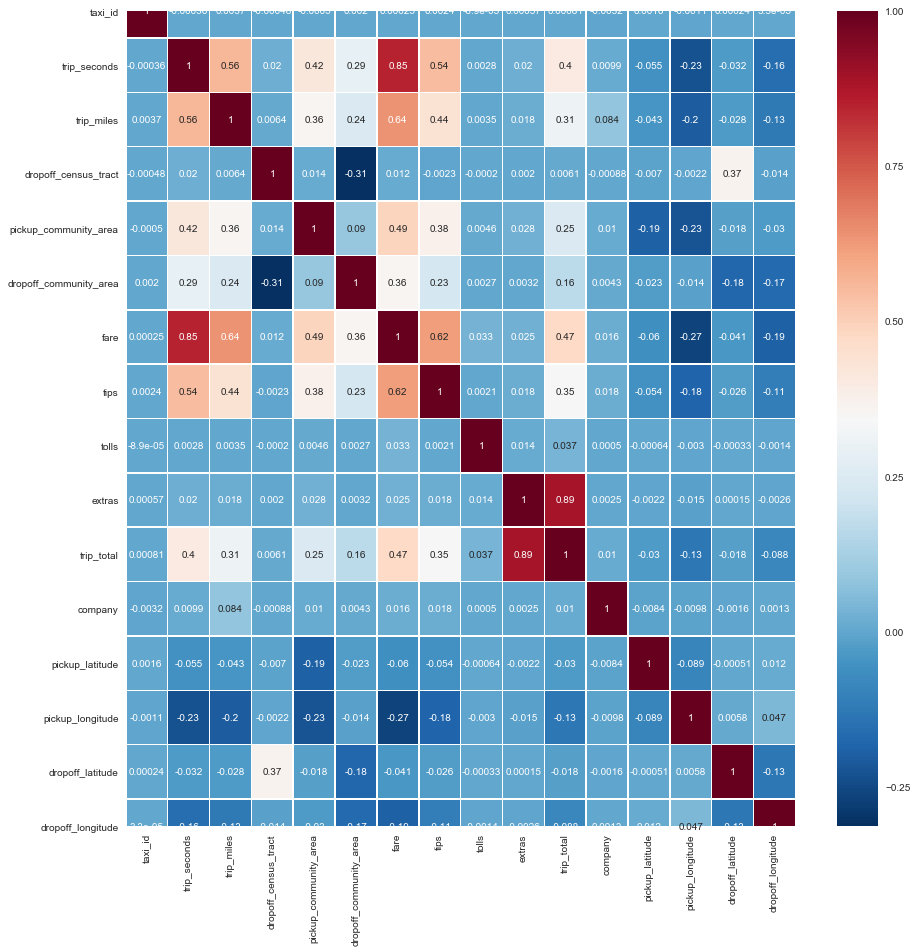

In [61]:
# Pearson's Correlation 

pearson_corr = taxi_trips_2016.corr(method='pearson')

rcParams['figure.figsize'] = 15, 15
sns.heatmap(pearson_corr, 
            xticklabels=pearson_corr.columns,
            yticklabels=pearson_corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
print("")

<b>Analysis:</b> From the above heatmap, we can understand that there are few fields that are correlated with 'tips'. The strongest correlation of tips is with fare. As the fare increases, the tips also tend to increase. Then comes the trip_seconds and trip_miles. As the time and distance of the trip increases, the tips given also increases. We can also see that the pickup and dropoff latitudes and longitudes have a negative correlation with tips. This means that as the latitudes and longitude increases, the tips tend to have a decrease.

<b>Scatter Plots between tips and the strongly correlated variables</b>

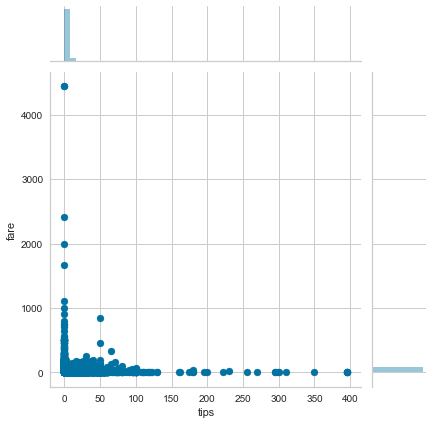

In [78]:
# ScatterPlot between target (tips) and 'fare'

sns.jointplot(x=taxi_trips_2016['tips'], y=taxi_trips_2016['fare'])
plt.show()

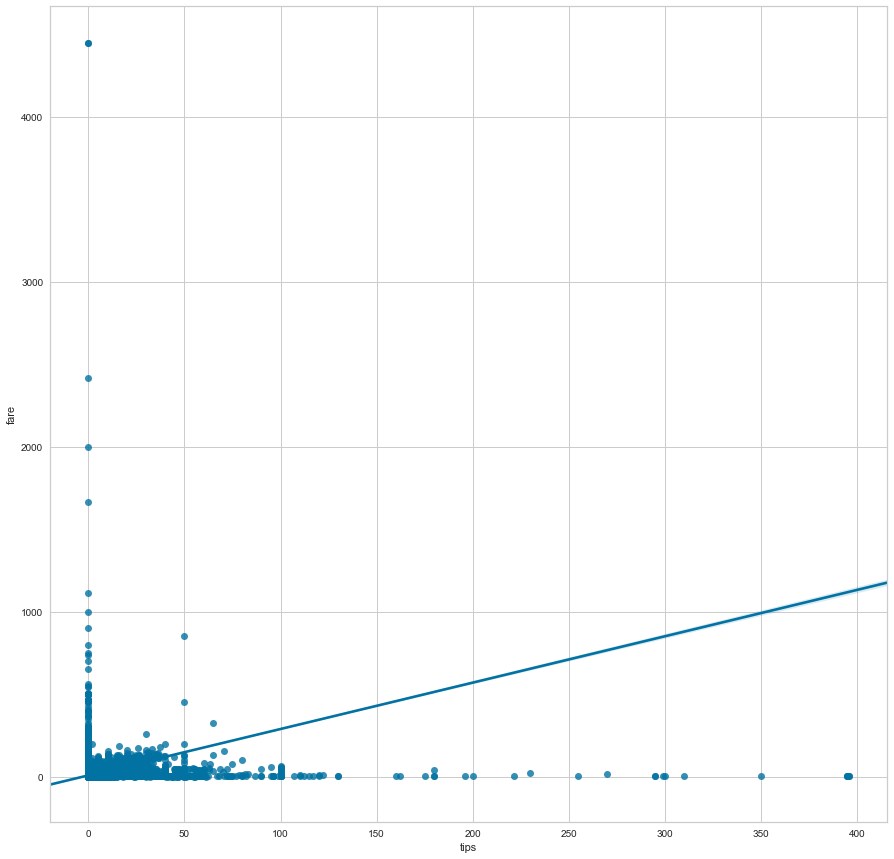

In [83]:
# We can plot above graph by using linear regression plot

sns.regplot(x='tips', y="fare", data=taxi_trips_2016);
plt.show()

<b>Analysis:</b>

As plotted in the graphs above, we do see that a change in fare definitely has an impact on the tips as well.
As the fare increases, the tips value also increses.

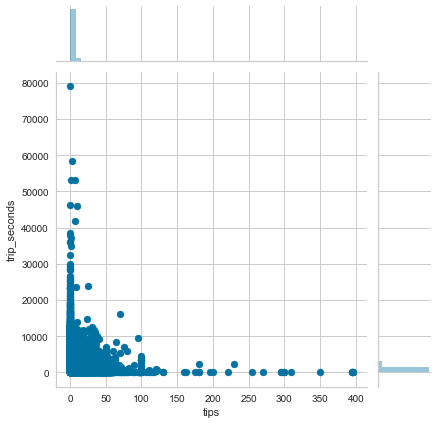

In [79]:
#ScatterPlot between target (tips) and 'trip_seconds'

sns.jointplot(x=taxi_trips_2016['tips'], y=taxi_trips_2016['trip_seconds'])
plt.show()

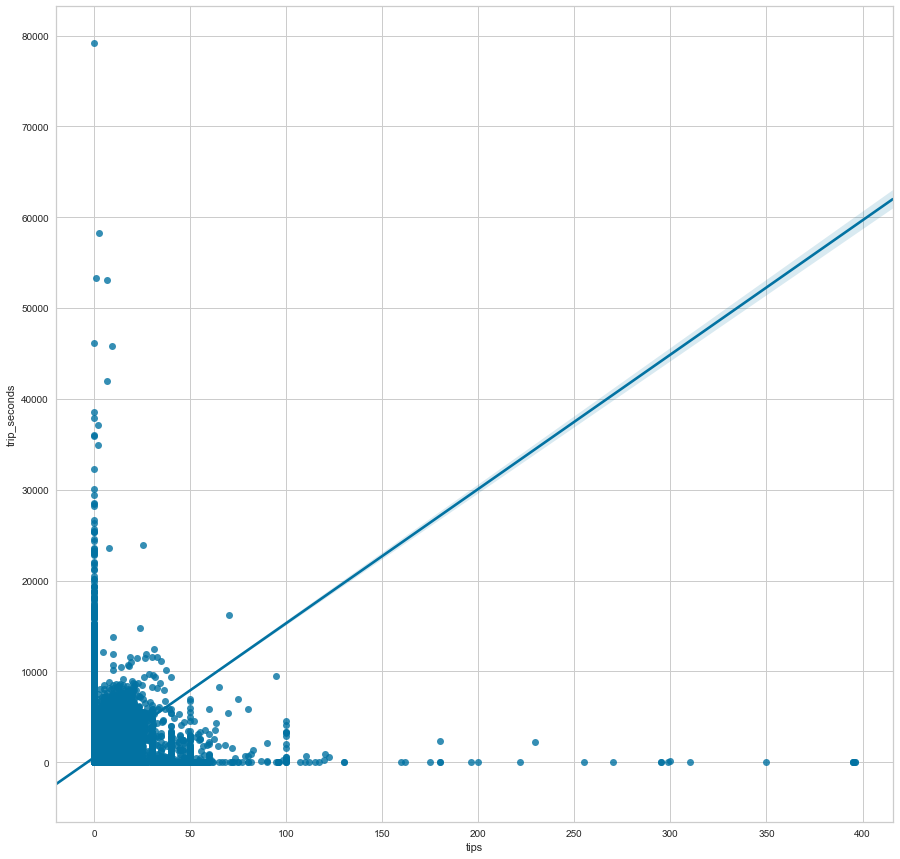

In [84]:
# We can plot above graph by using linear regression plot

sns.regplot(x='tips', y="trip_seconds", data=taxi_trips_2016);
plt.show()

<b>Analysis:</b>

As plotted in the graphs above, we do see that there is a change in tips as the time of the trip changes. 
As the trip_seconds increases, the tips value also increses.

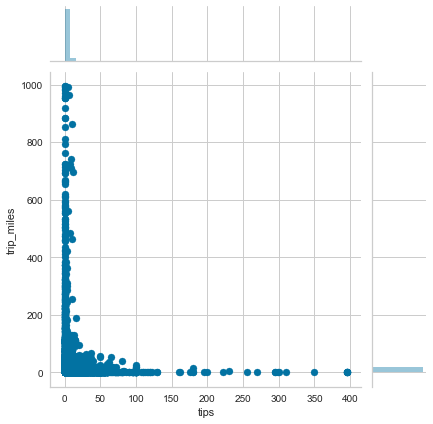

In [80]:
#ScatterPlot between target (tips) and 'trip_miles'

sns.jointplot(x=taxi_trips_2016['tips'], y=taxi_trips_2016['trip_miles'])
plt.show()

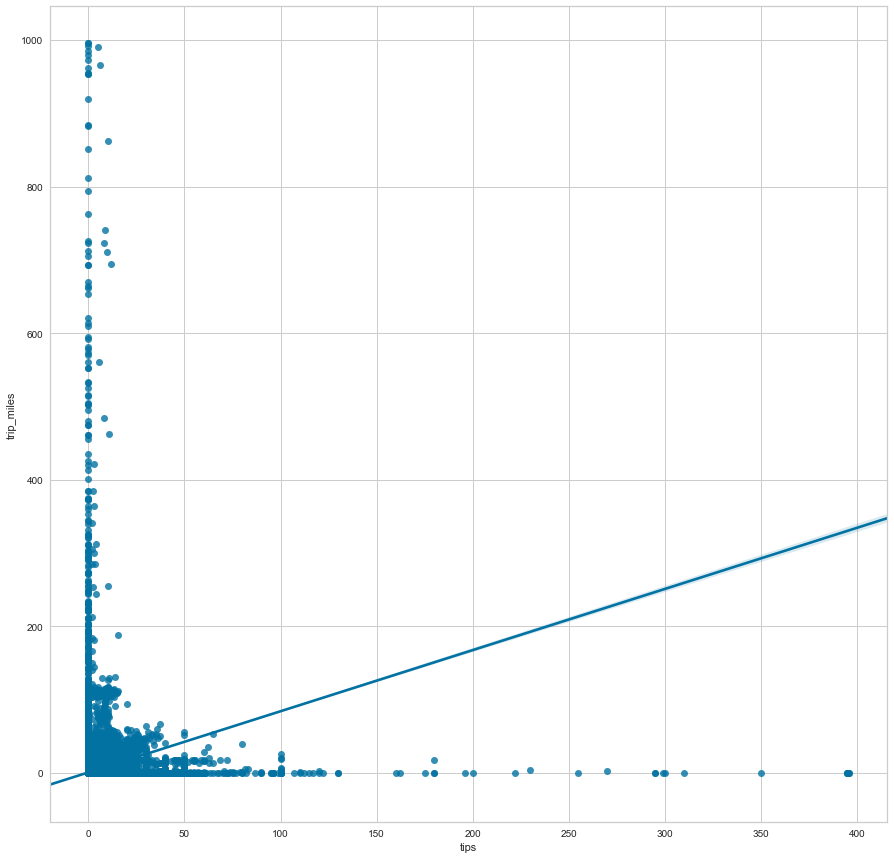

In [82]:
# We can plot above graph by using linear regression plot

sns.regplot(x='tips', y="trip_miles", data=taxi_trips_2016);
plt.show()

<b>Analysis:</b>

As seen in the graphs above, we do see that the tips value changes along with the change in the distance of the trip. As the trip_miles increases, the tips value also increses.

In [88]:
# Linearly correlated columns with Target

taxi_trips_2016.corr()["tips"].sort_values(ascending=False) #descending order

tips                      1.000000
fare                      0.618485
trip_seconds              0.544883
trip_miles                0.439544
pickup_community_area     0.376597
trip_total                0.347734
dropoff_community_area    0.225430
extras                    0.018396
company                   0.017947
taxi_id                   0.002392
tolls                     0.002108
dropoff_census_tract     -0.002348
dropoff_latitude         -0.026455
pickup_latitude          -0.054043
dropoff_longitude        -0.112690
pickup_longitude         -0.181162
Name: tips, dtype: float64

<b>OUTLIER DETECTION</b>

An outlier is an observation that appears to deviate markedly from other observations in the sample. Identification of potential outliers is important for the following reasons:

1)An outlier may indicate bad data. For example, the data may have been coded incorrectly or an experiment may not have been run correctly. If it can be determined that an outlying point is in fact errorneous, then the outlying value should be deleted from the analysis (or corrected if possible).

2)In some cases, it may not be possible to determine if an outlying point is bad data. Outliers may be due to random variation or may indicate something scientifically interesting. In any event, we typically do not want to simply delete the outlying observation.However, if the data contains significant outliers, we may need to consider the use of robust statistical techniques.

In [92]:
# Lets create a copy of taxi trip (numerical data) for further Exploratory Data Analysis-so that no changes affects the original dataset

taxi_trips_2016_EDA = taxi_trips_2016_num #copying data into new dataframe

taxi_trips_2016_EDA.head()

,tips,fare,trip_seconds,trip_miles,pickup_community_area,trip_total,dropoff_community_area,extras,company,taxi_id,tolls,dropoff_census_tract,dropoff_latitude,pickup_latitude,dropoff_longitude,pickup_longitude
8,2.0,5.00,180.0,0.0,8.0,8.50,32.0,1.5,82.0,7418.0,0.0,504.0,744.0,210.0,605.0,470.0
10,1.0,7.00,480.0,1.3,8.0,8.00,8.0,0.0,109.0,1078.0,0.0,792.0,419.0,161.0,615.0,649.0
11,0.0,7.25,420.0,0.0,8.0,7.25,28.0,0.0,8.0,6641.0,0.0,807.0,411.0,419.0,545.0,615.0
13,0.0,6.25,420.0,0.0,8.0,6.25,28.0,0.0,107.0,7984.0,0.0,749.0,681.0,419.0,196.0,615.0
15,0.0,10.75,720.0,0.0,7.0,10.75,28.0,0.0,101.0,221.0,0.0,807.0,411.0,642.0,545.0,32.0


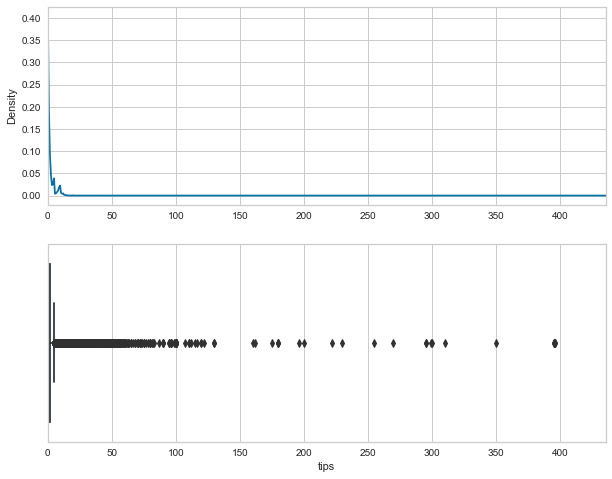

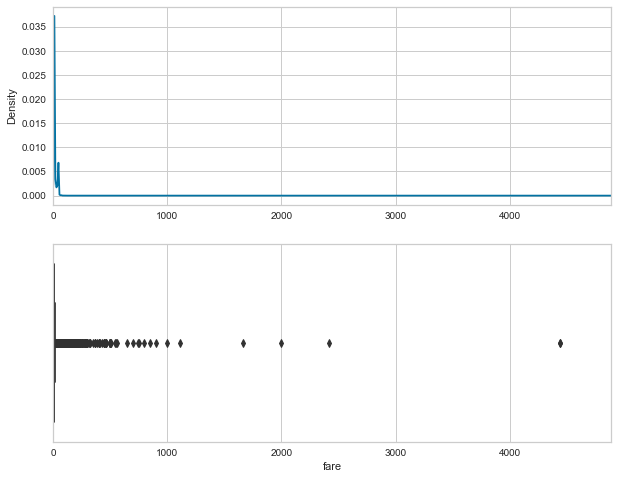

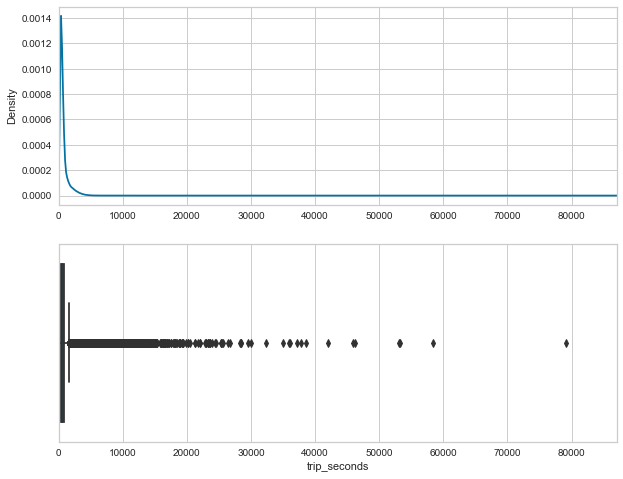

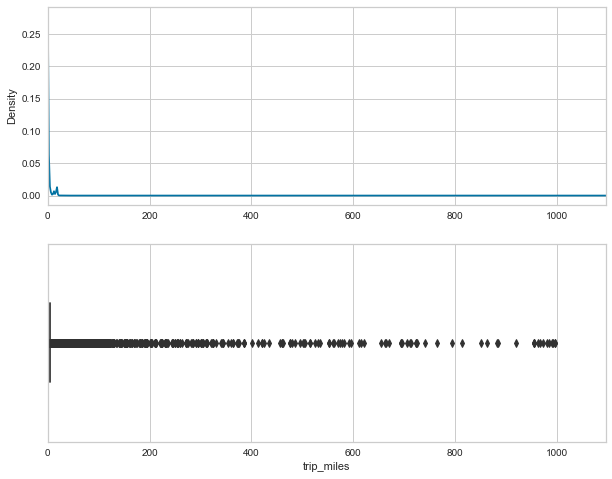

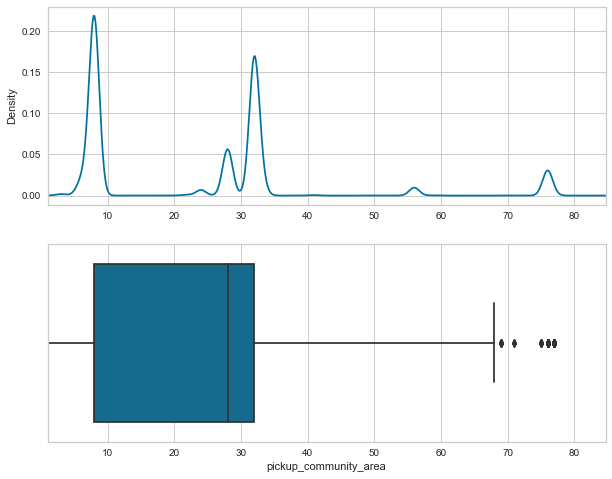

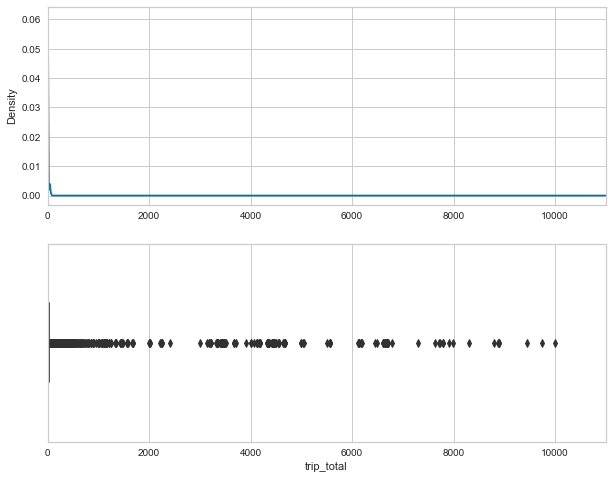

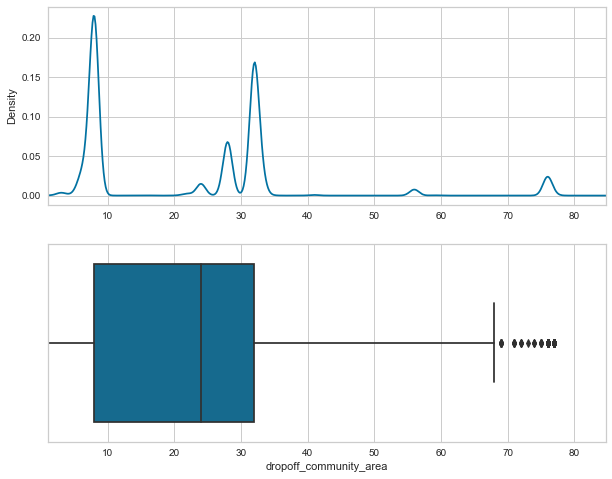

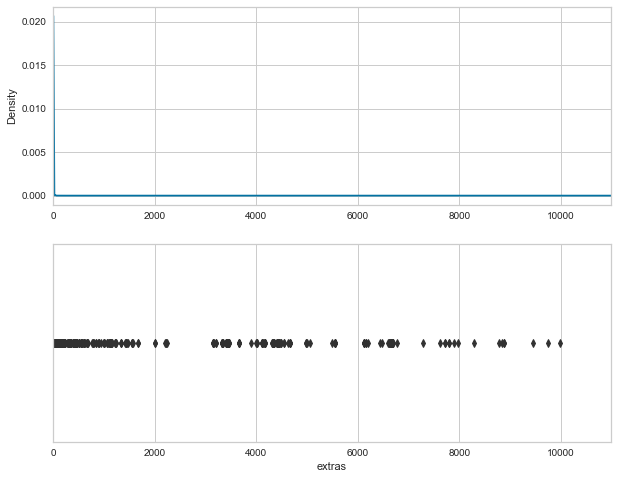

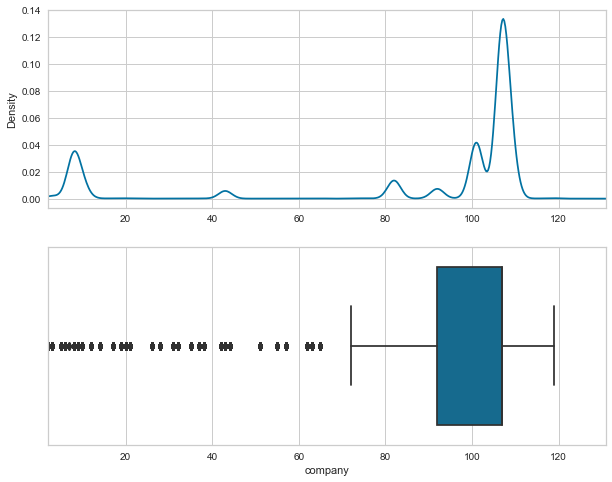

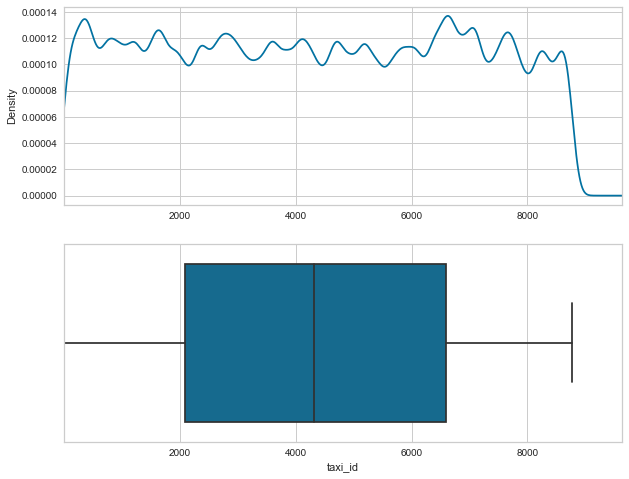

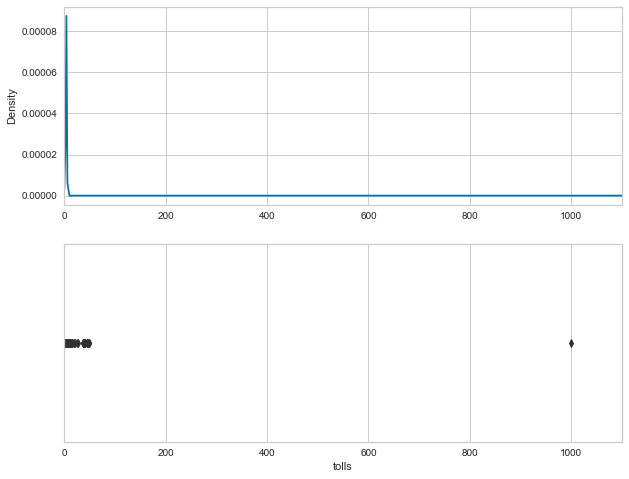

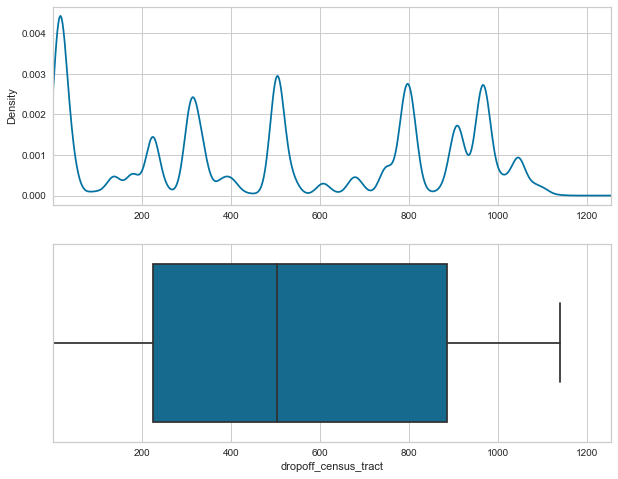

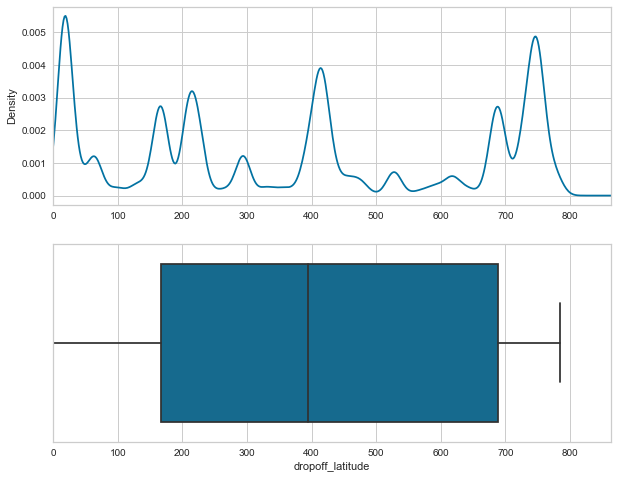

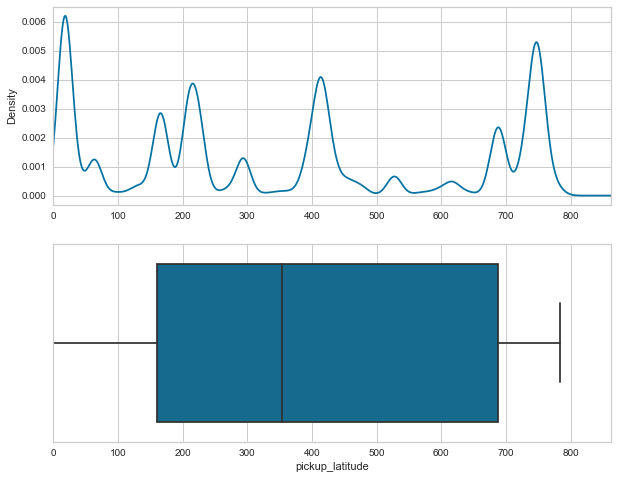

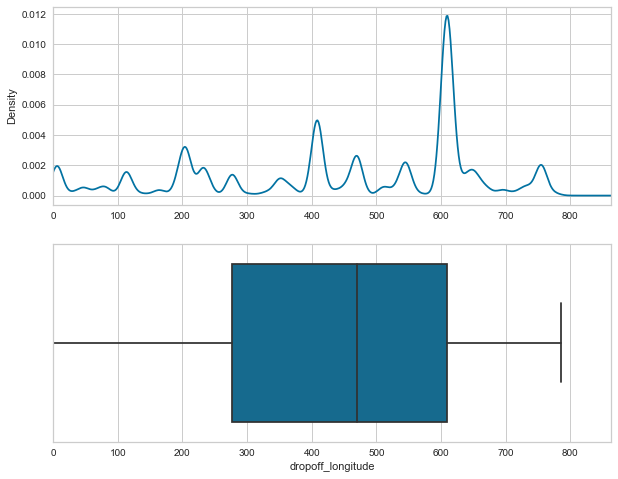

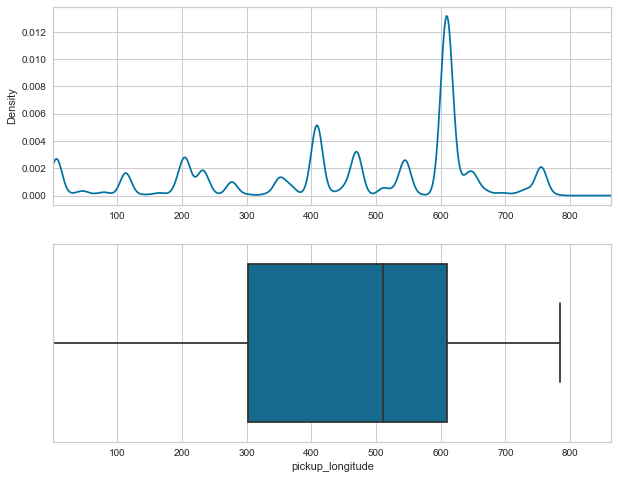

In [93]:
#Loop for detecting outliers using Boxplots and saving the plots.
  
for i in range(0, taxi_trips_2016_EDA.shape[1]):
    cols = taxi_trips_2016_EDA.columns
    plt.figure(figsize=(10,8))
    plt.subplot(211) # creating subplot
    plt.xlim(taxi_trips_2016_EDA[cols[i]].min(), taxi_trips_2016_EDA[cols[i]].max()*1.1) # setting limits for x axis
    ax =taxi_trips_2016_EDA[cols[i]].plot(kind='kde') # kernel density plots
    plt.subplot(212) #creating another subplot
    plt.xlim(taxi_trips_2016_EDA[cols[i]].min(),taxi_trips_2016_EDA[cols[i]].max()*1.1)
    sns.boxplot(x=taxi_trips_2016_EDA[cols[i]]) # creating boxplot using seaborn
    plt.show() # to display plot

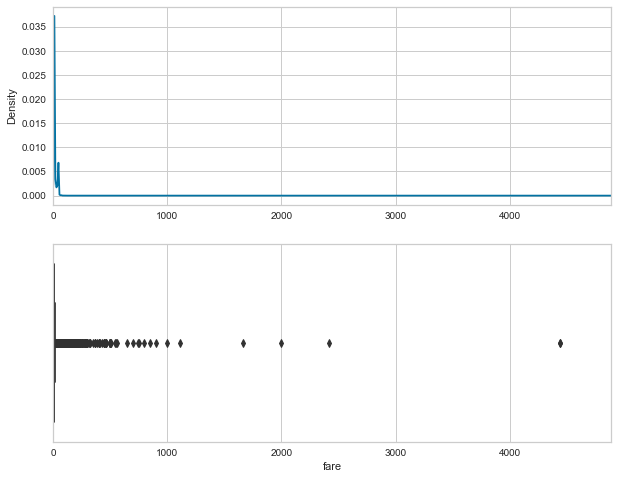

In [95]:
# To Check Outlier Detection Of One Variable - (just to see the process,we will work with one variable and detect ouliers)

j = 'fare'
 
plt.figure(figsize=(10,8))
plt.subplot(211)
plt.xlim(taxi_trips_2016_EDA[j].min(), taxi_trips_2016_EDA[j].max()*1.1) #x limit
ax = taxi_trips_2016_EDA[j].plot(kind='kde')
plt.subplot(212)
plt.xlim(taxi_trips_2016_EDA[j].min(), taxi_trips_2016_EDA[j].max()*1.1)
sns.boxplot(x=taxi_trips_2016_EDA[j])
plt.show()

/Users/Godfather/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/Godfather/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Godfather/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pa

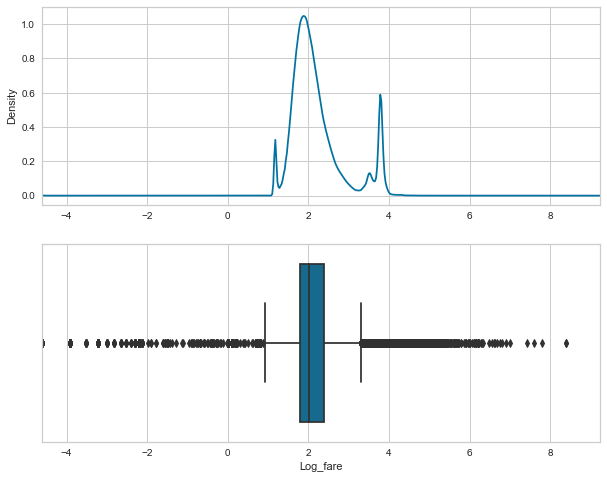

In [96]:
# Remove any zeros (otherwise we get (-inf)
j='fare'
taxi_trips_2016_EDA.loc[taxi_trips_2016_EDA[j] == 0, j] = np.nan
 
# Drop NA
taxi_trips_2016_EDA.dropna(inplace=True)
 
# Log Transformation of variable
taxi_trips_2016_EDA['Log_' + j] = np.log(taxi_trips_2016_EDA[j])

j= 'Log_fare'

#plotting
plt.figure(figsize=(10,8))

plt.subplot(211) #first subplot
plt.xlim(taxi_trips_2016_EDA[j].min(), taxi_trips_2016_EDA[j].max()*1.1)
ax = taxi_trips_2016_EDA[j].plot(kind='kde')  #density plot
 
plt.subplot(212) #second subplot
plt.xlim(taxi_trips_2016_EDA[j].min(),taxi_trips_2016_EDA[j].max()*1.1)
sns.boxplot(x=taxi_trips_2016_EDA[j])  #Boxplot
plt.show()




<b>Summary of Outlier Detection</b>

A quick breakdown of what we have done. We load the data into Python, remove any rows which has missing data. We then used a log transform to transform the data. 
We were able to see the outliers present in column 'fare'.

## STEP 4: SPLITTING TAXI TRIPS DATA INTO TRAIN AND TEST


Separating data into training and testing sets is an important part of evaluating data mining models. Typically, when you separate a data set into a training set and testing set, most of the data (80%) is used for training, and a smaller portion of the data (20%) is used for testing.

From now onwards,we will be using the train data. We will keep the Test data aside to check the model performance.

In [101]:
#Dividing the data into attributes and labels

taxi_trips_num_X = taxi_trips_2016_num.values
taxi_trips_num_y = taxi_trips_2016['tips'].values.reshape(-1,1)

In [102]:
#Splitting the data into test and train sets

taxi_trips_num_X_train, taxi_trips_num_X_test, taxi_trips_num_y_train, taxi_trips_num_y_test = train_test_split(taxi_trips_num_X, taxi_trips_num_y, test_size=0.2, random_state=0)

## STEP 5: FEATURE SELECTION AND MODELLING

Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

We will be trying a linear regression with multiple combinations of data to find out which are the variable contributing to the success of receiving tips.

<b>LINEAR REGRESSION</b>

Linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). 
Linear regression is a basic and commonly used type of predictive analysis.  The overall idea of regression is to examine two things: 

(1) Does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  

(2) Which variables in particular are significant predictors of the outcome variable?

<b>1. LINEAR REGRESSION WITH ALL THE NUMERICAL VARIABLES</b>

In [109]:
# Linear regression with all the numerical variables.

# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(taxi_trips_num_X_train, taxi_trips_num_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [104]:
# Seeing the value of the intercept and slope calculated by the linear regression algorithm for our dataset

#To retrieve the intercept:
print(regr.intercept_)

#For retrieving the slope:
print(regr.coef_)

[-6.16351414e-12]
[[ 1.00000000e+00 -1.44722815e-15 -8.30305599e-18 -6.83346869e-17
   2.30787350e-16  1.26439568e-15 -9.40932705e-17 -1.23916672e-15
  -7.40970661e-17  6.60261915e-18 -2.98465554e-18 -2.72554345e-17
   6.46799624e-18 -6.48220819e-18  4.04467804e-18 -5.08185944e-17]]


In [105]:
# Making predictions on the test data

taxi_trips_num_y_pred = regr.predict(taxi_trips_num_X_test)

In [115]:
# Comparing the actual output values for X_test with the predicted values

num_df = pd.DataFrame({'Actual': taxi_trips_num_y_test.flatten(), 'Predicted': taxi_trips_num_y_pred.flatten()})
num_df

,Actual,Predicted
0,2.0,2.000000e+00
1,0.0,-6.165200e-12
2,9.2,9.200000e+00
3,0.0,-6.203930e-12
4,0.0,-6.198648e-12
...,...,...
1512804,1.5,1.500000e+00
1512805,0.0,-6.179260e-12
1512806,14.6,1.460000e+01
1512807,2.0,2.000000e+00


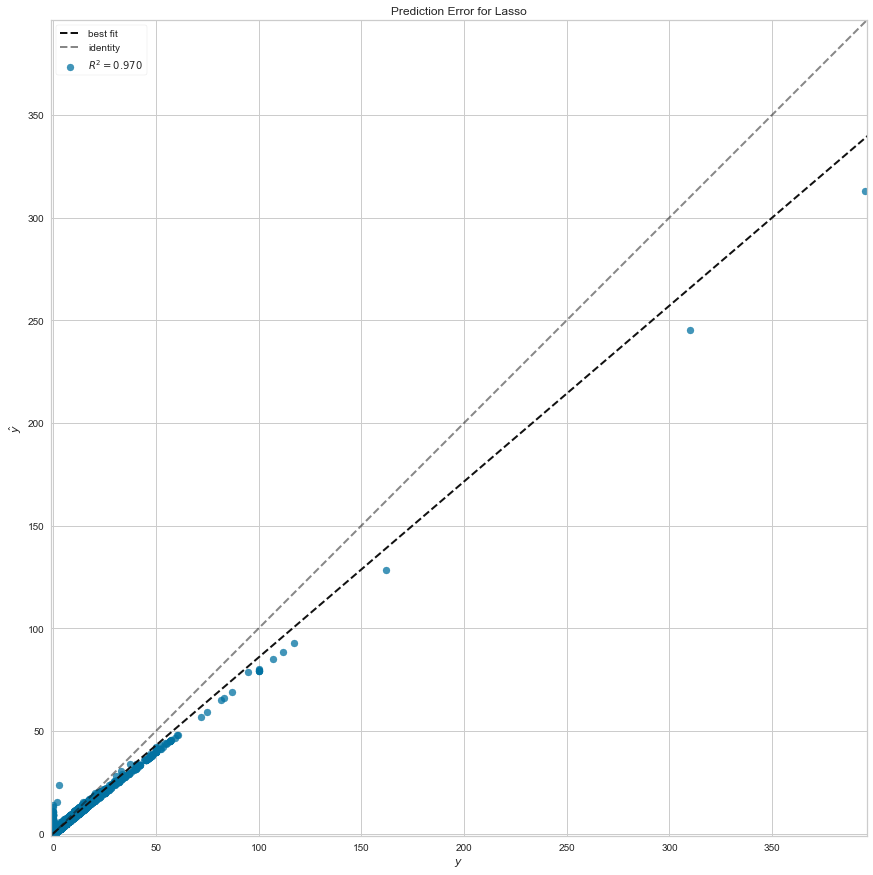

In [117]:
# PREDICTION ERROR GRAPH

# Instantiate the linear model and visualizer
model_num = PredictionError(Lasso())

model_num.fit(taxi_trips_num_X_train, taxi_trips_num_y_train)  # Fit the training data to the visualizer
model_num.score(taxi_trips_num_X_test, taxi_trips_num_y_test)  # Evaluate the model on the test data
model_num.show()                                               # Finalize and render the figure

<b>Analysis:</b>

By looking into the predicted values for the linear regression with the numeric variables, we can see that the predictions are very closely successful for the actual values that are greater than 0. However, we do get incorrect (negative) predictions for the actual values that are equal to 0.

<b>2. LINEAR REGRESSION WITH ALL THE NEGATIVELY CORRELATED VARIABLES</b> 

In [110]:
# Creating a df with only the negatively correlated variables

neg_taxi_trips_2016 = taxi_trips_2016.loc[:, ["dropoff_census_tract", "tolls", "pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"]]

#Dividing the data into attributes and labels for negative correlation

taxi_trips_neg_X = neg_taxi_trips_2016.values
taxi_trips_neg_y = taxi_trips_2016['tips'].values.reshape(-1,1)

In [111]:
#Splitting the data into test and train sets

taxi_trips_neg_X_train, taxi_trips_neg_X_test, taxi_trips_neg_y_train, taxi_trips_neg_y_test = train_test_split(taxi_trips_neg_X, taxi_trips_neg_y, test_size=0.2, random_state=0)

In [112]:
# Create linear regression object
neg_regr = LinearRegression()

# Train the model using the training sets
neg_regr.fit(taxi_trips_neg_X_train, taxi_trips_neg_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
# Seeing the value of the intercept and slope calculated by the linear regression algorithm for our dataset

#To retrieve the intercept:
print(neg_regr.intercept_)

#For retrieving the slope:
print(neg_regr.coef_)

[3.57424042]
[[ 8.23036684e-05  3.11337571e-01 -6.79186993e-04 -2.33095105e-03
  -4.33789971e-04 -1.37321215e-03]]


In [114]:
# Making predictions on the test data

taxi_trips_neg_y_pred = neg_regr.predict(taxi_trips_neg_X_test)

In [116]:
# Comparing the actual output values for X_test with the predicted values

neg_df = pd.DataFrame({'Actual': taxi_trips_neg_y_test.flatten(), 'Predicted': taxi_trips_neg_y_pred.flatten()})
neg_df

,Actual,Predicted
0,2.0,0.787124
1,0.0,0.859128
2,9.2,1.578619
3,0.0,1.850171
4,0.0,1.221528
...,...,...
1512804,1.5,1.282387
1512805,0.0,1.262293
1512806,14.6,1.872023
1512807,2.0,0.591227


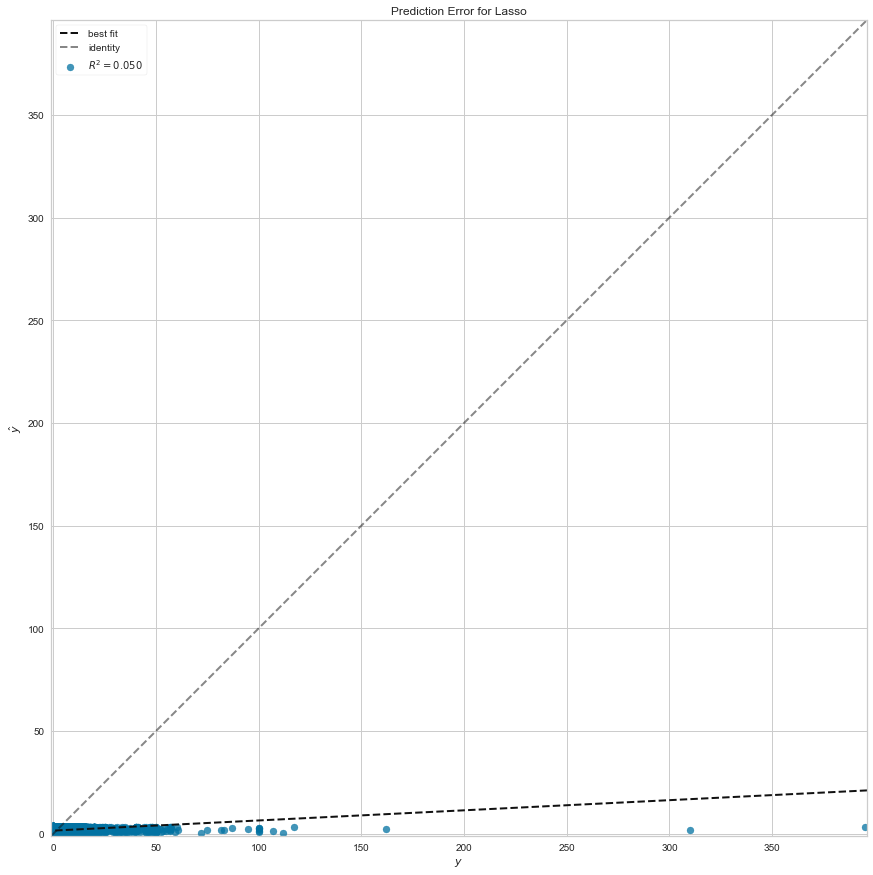

In [119]:
# PREDICTION ERROR GRAPH

# Instantiate the linear model and visualizer
model_neg = PredictionError(Lasso())

model_neg.fit(taxi_trips_neg_X_train, taxi_trips_neg_y_train)  # Fit the training data to the visualizer
model_neg.score(taxi_trips_neg_X_test, taxi_trips_neg_y_test)  # Evaluate the model on the test data
model_neg.show()                         # Finalize and render the figure

<b>Analysis</b>:

By looking into the predicted values for the linear regression with the negatively correlated variables, we can see that the predictions are very poor. We can hardly find a good prediction in the list. Hence we can come to a conclusion that the negatively correlated variables do not yield a good prediction for our target variable.

<b>3. LINEAR REGRESSION WITH ALL THE VARIABLES RELATED TO THE COST OF THE TRIP </b>

In [127]:
# Creating a df with only the variables related to the cost of the trip

cost_taxi_trips_2016 = taxi_trips_2016.loc[:, ["fare", "extras", "trip_total", "tolls"]]

#Dividing the data into attributes and labels for negative correlation

taxi_trips_cost_X = cost_taxi_trips_2016.values
taxi_trips_cost_y = taxi_trips_2016['tips'].values.reshape(-1,1)

In [121]:
#Splitting the data into test and train sets

taxi_trips_cost_X_train, taxi_trips_cost_X_test, taxi_trips_cost_y_train, taxi_trips_cost_y_test = train_test_split(taxi_trips_cost_X, taxi_trips_cost_y, test_size=0.2, random_state=0)


In [122]:
# Create linear regression object
cost_regr = LinearRegression()

# Train the model using the training sets
cost_regr.fit(taxi_trips_cost_X_train, taxi_trips_cost_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [123]:
# Seeing the value of the intercept and slope calculated by the linear regression algorithm for our dataset

#To retrieve the intercept:
print(cost_regr.intercept_)

#For retrieving the slope:
print(cost_regr.coef_)

[-3.82604426e-06]
[[-0.99999465 -0.9999954   0.9999954  -0.99999549]]


In [124]:
# Making predictions on the test data

taxi_trips_cost_y_pred = cost_regr.predict(taxi_trips_cost_X_test)

In [125]:
# Comparing the actual output values for X_test with the predicted values

cost_df = pd.DataFrame({'Actual': taxi_trips_cost_y_test.flatten(), 'Predicted': taxi_trips_cost_y_pred.flatten()})
cost_df

,Actual,Predicted
0,2.0,1.999991
1,0.0,0.000004
2,9.2,9.199989
3,0.0,0.000007
4,0.0,0.000001
...,...,...
1512804,1.5,1.499998
1512805,0.0,0.000001
1512806,14.6,14.599965
1512807,2.0,1.999992


/Users/Godfather/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13688.702556679025, tolerance: 4208.546193023681
  positive)


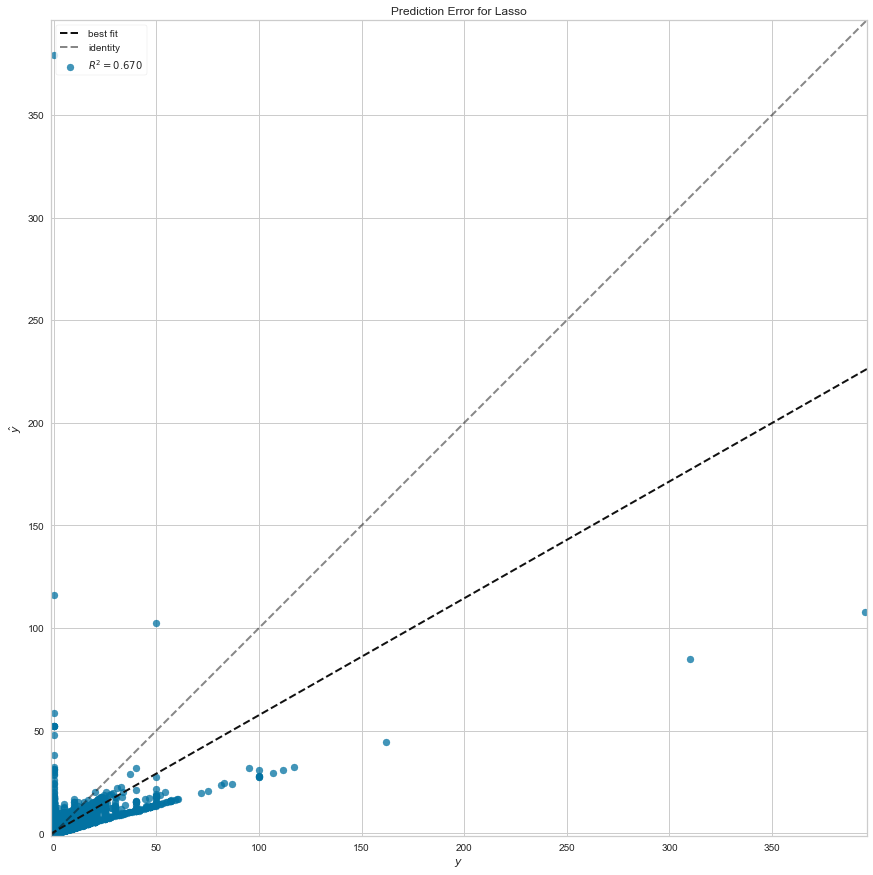

In [126]:
# PREDICTION ERROR GRAPH

# Instantiate the linear model and visualizer
model_cost = PredictionError(Lasso())

model_cost.fit(taxi_trips_cost_X_train, taxi_trips_cost_y_train)  # Fit the training data to the visualizer
model_cost.score(taxi_trips_cost_X_test, taxi_trips_cost_y_test)  # Evaluate the model on the test data
model_cost.show()                                                 # Finalize and render the figure

<b>Analysis</b>:

Looking at the predicted values for the linear regression with all the variables related to the cost of the trip, we can see that the predictions are closely accurate. We can therefore come to a conclusion that the variables related to the cost of the trip are closely related to the target variable (tips). An increase in the cost variables will definitely have an increase in the target variable and vice versa.

<b>4. LINEAR REGRESSION WITH THE DISTANCE AND DURATION VARIABLES OF THE TRIP</b>

In [128]:
# Creating a df with only the distance and duration variables

dd_taxi_trips_2016 = taxi_trips_2016.loc[:, ["trip_miles", "trip_seconds"]]

#Dividing the data into attributes and labels for negative correlation

taxi_trips_dd_X = dd_taxi_trips_2016.values
taxi_trips_dd_y = taxi_trips_2016['tips'].values.reshape(-1,1)

In [129]:
#Splitting the data into test and train sets

taxi_trips_dd_X_train, taxi_trips_dd_X_test, taxi_trips_dd_y_train, taxi_trips_dd_y_test = train_test_split(taxi_trips_dd_X, taxi_trips_dd_y, test_size=0.2, random_state=0)


In [130]:
# Create linear regression object
dd_regr = LinearRegression()

# Train the model using the training sets
dd_regr.fit(taxi_trips_dd_X_train, taxi_trips_dd_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [131]:
# Seeing the value of the intercept and slope calculated by the linear regression algorithm for our dataset

#To retrieve the intercept:
print(dd_regr.intercept_)

#For retrieving the slope:
print(dd_regr.coef_)

[0.12835406]
[[0.1038407  0.00160184]]


In [132]:
# Making predictions on the test data

taxi_trips_dd_y_pred = dd_regr.predict(taxi_trips_dd_X_test)

In [133]:
# Comparing the actual output values for X_test with the predicted values

dd_df = pd.DataFrame({'Actual': taxi_trips_dd_y_test.flatten(), 'Predicted': taxi_trips_dd_y_pred.flatten()})
dd_df

,Actual,Predicted
0,2.0,0.512796
1,0.0,1.798460
2,9.2,5.413272
3,0.0,2.455773
4,0.0,0.801127
...,...,...
1512804,1.5,1.754270
1512805,0.0,0.993348
1512806,14.6,6.201426
1512807,2.0,0.897238


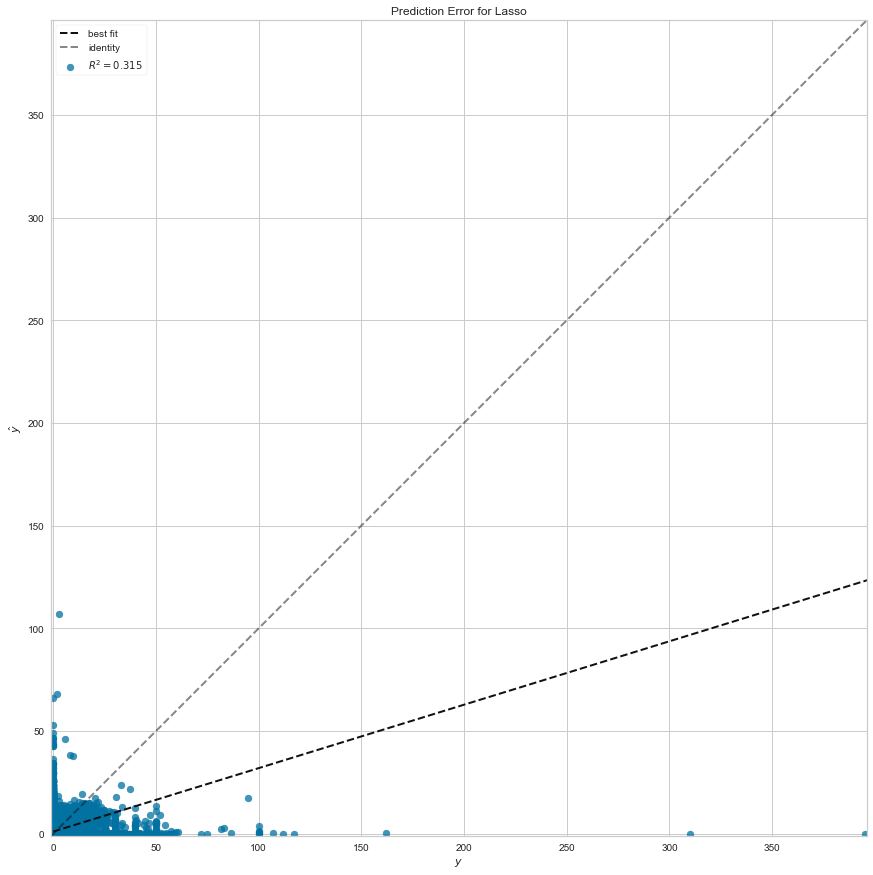

In [134]:
# PREDICTION ERROR GRAPH

# Instantiate the linear model and visualizer
model_dd = PredictionError(Lasso())

model_dd.fit(taxi_trips_dd_X_train, taxi_trips_dd_y_train)  # Fit the training data to the visualizer
model_dd.score(taxi_trips_dd_X_test, taxi_trips_dd_y_test)  # Evaluate the model on the test data
model_dd.show()  

<b>Analysis</b>:

Seeing the predicted values for the linear regression with the variables related to the distance and duration of the trip, we can see that the predictions are moderate. We can hardly find a good prediction nor a bad prediction in the list. Therefore, we can say that the duration and distance variables when taken separately, do not play a vital role in predicting the target.

<b>5. LINEAR REGRESSION WITH THE VARIABLES RELATED TO COMMUNITY AREA</b>

In [192]:
# Creating a df with only the variables related to community area

ca_taxi_trips_2016 = taxi_trips_2016.loc[:, ["pickup_community_area", "dropoff_community_area"]]

#Dividing the data into attributes and labels for negative correlation

taxi_trips_ca_X = ca_taxi_trips_2016.values
taxi_trips_ca_y = taxi_trips_2016['tips'].values.reshape(-1,1)

In [136]:
#Splitting the data into test and train sets

taxi_trips_ca_X_train, taxi_trips_ca_X_test, taxi_trips_ca_y_train, taxi_trips_ca_y_test = train_test_split(taxi_trips_ca_X, taxi_trips_ca_y, test_size=0.2, random_state=0)


In [137]:
# Create linear regression object
ca_regr = LinearRegression()

# Train the model using the training sets
ca_regr.fit(taxi_trips_ca_X_train, taxi_trips_ca_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
# Seeing the value of the intercept and slope calculated by the linear regression algorithm for our dataset

#To retrieve the intercept:
print(ca_regr.intercept_)

#For retrieving the slope:
print(ca_regr.coef_)

[-0.37006744]
[[0.0527103  0.03060447]]


In [139]:
# Making predictions on the test data

taxi_trips_ca_y_pred = ca_regr.predict(taxi_trips_ca_X_test)

In [140]:
# Comparing the actual output values for X_test with the predicted values

ca_df = pd.DataFrame({'Actual': taxi_trips_ca_y_test.flatten(), 'Predicted': taxi_trips_ca_y_pred.flatten()})
ca_df

,Actual,Predicted
0,2.0,1.561498
1,0.0,1.030958
2,9.2,3.642602
3,0.0,1.530894
4,0.0,0.296451
...,...,...
1512804,1.5,0.786122
1512805,0.0,1.030958
1512806,14.6,2.377555
1512807,2.0,1.030958


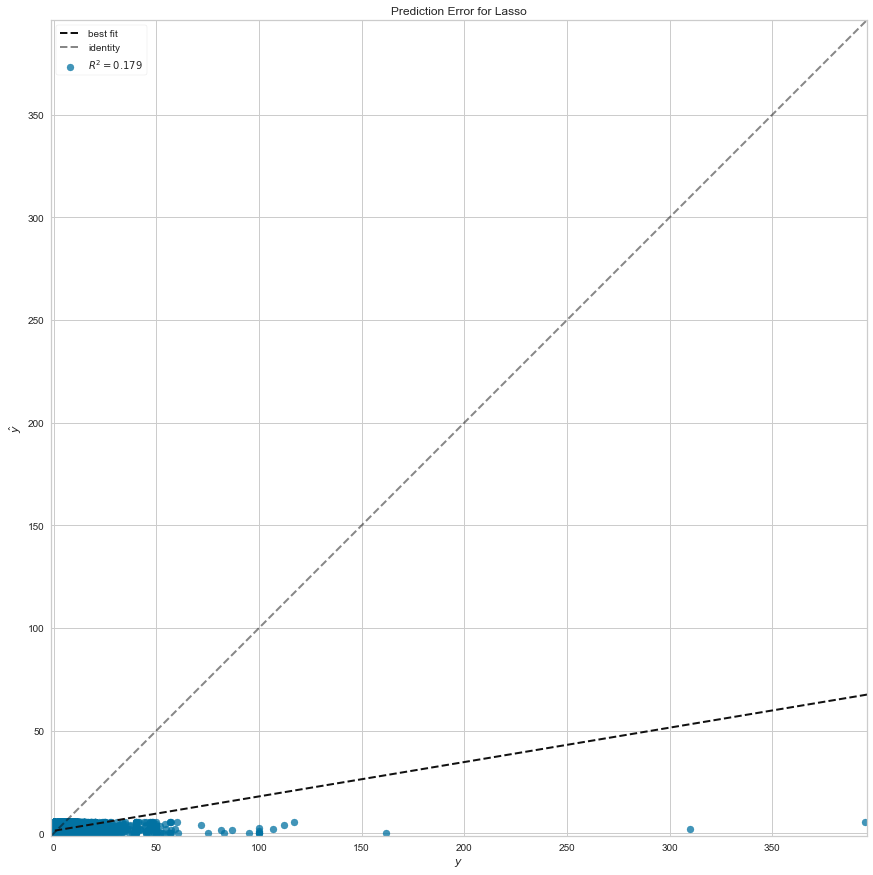

In [141]:
# PREDICTION ERROR GRAPH

# Instantiate the linear model and visualizer
model_ca = PredictionError(Lasso())

model_ca.fit(taxi_trips_ca_X_train, taxi_trips_ca_y_train)  # Fit the training data to the visualizer
model_ca.score(taxi_trips_ca_X_test, taxi_trips_ca_y_test)  # Evaluate the model on the test data
model_ca.show()                                             # Finalize and render the figure

<b>Analysis:</b>

By looking into the predicted values for the linear regression with the variables related to community area, we can see that the predictions are not too good. We can hardly find a perfect prediction in the list. Hence we can come to a conclusion that the variables related to community area do not make much changes in the prediction for our target variable.

<b>5. LINEAR REGRESSION WITH THE VARIABLES RELATED LATITUDES AND LONGITUDES</b>

In [142]:
# Creating a df with the variables related to latitudes and longitudes

ll_taxi_trips_2016 = taxi_trips_2016.loc[:, ["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"]]

#Dividing the data into attributes and labels for negative correlation

taxi_trips_ll_X = ll_taxi_trips_2016.values
taxi_trips_ll_y = taxi_trips_2016['tips'].values.reshape(-1,1)

In [143]:
#Splitting the data into test and train sets

taxi_trips_ll_X_train, taxi_trips_ll_X_test, taxi_trips_ll_y_train, taxi_trips_ll_y_test = train_test_split(taxi_trips_ll_X, taxi_trips_ll_y, test_size=0.2, random_state=0)


In [144]:
# Create linear regression object
ll_regr = LinearRegression()

# Train the model using the training sets
ll_regr.fit(taxi_trips_ll_X_train, taxi_trips_ll_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [145]:
# Seeing the value of the intercept and slope calculated by the linear regression algorithm for our dataset

#To retrieve the intercept:
print(ll_regr.intercept_)

#For retrieving the slope:
print(ll_regr.coef_)

[3.601284]
[[-0.00068033 -0.00233308 -0.00039347 -0.00136854]]


In [146]:
# Making predictions on the test data

taxi_trips_ll_y_pred = ll_regr.predict(taxi_trips_ll_X_test)

In [147]:
# Comparing the actual output values for X_test with the predicted values

ll_df = pd.DataFrame({'Actual': taxi_trips_ll_y_test.flatten(), 'Predicted': taxi_trips_ll_y_pred.flatten()})
ll_df

,Actual,Predicted
0,2.0,0.825822
1,0.0,0.886632
2,9.2,1.586860
3,0.0,1.816661
4,0.0,1.181276
...,...,...
1512804,1.5,1.281314
1512805,0.0,1.289858
1512806,14.6,1.880837
1512807,2.0,0.607813


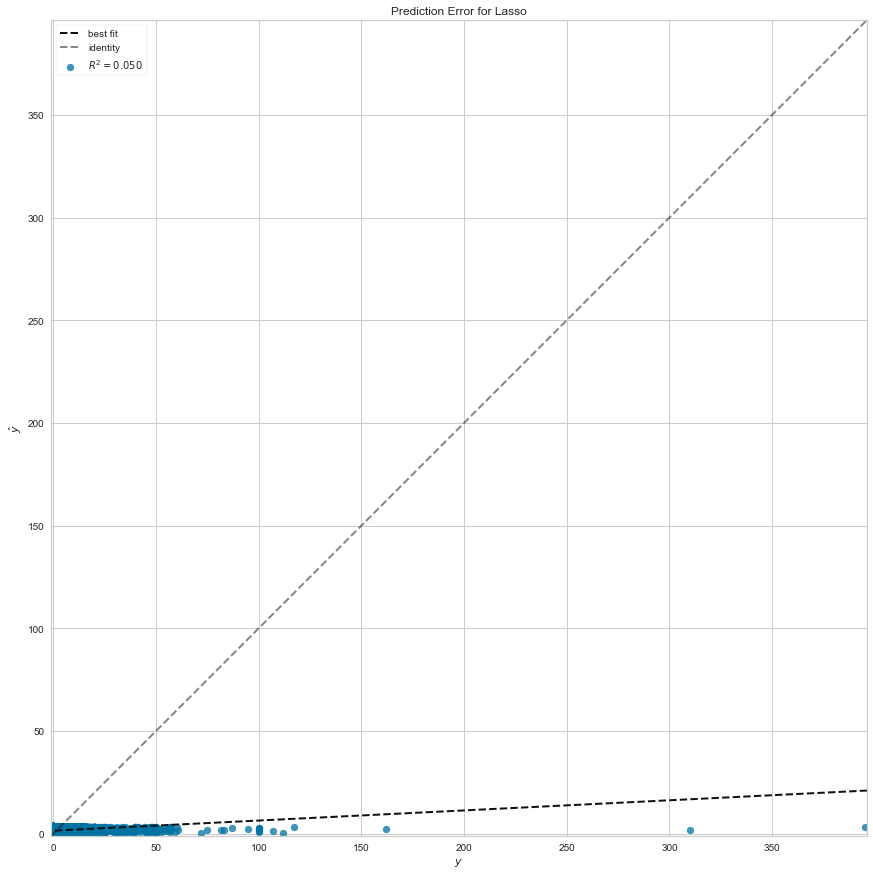

In [148]:
# PREDICTION ERROR GRAPH

# Instantiate the linear model and visualizer
model_ll = PredictionError(Lasso())

model_ll.fit(taxi_trips_ll_X_train, taxi_trips_ll_y_train)  # Fit the training data to the visualizer
model_ll.score(taxi_trips_ll_X_test, taxi_trips_ll_y_test)  # Evaluate the model on the test data
model_ll.show()                                             # Finalize and render the figure

<b>Analysis:</b>

Variables related to latitudes and longitudes have a negative correlation with the target variable. Checking the predicted values for the linear regression with the variables related to latitudes and longitudes, we can see that the predictions are not good. We can hardly find a good prediction in the list. Hence we can conclude that the variables related to community area are not directly proportional to the prediction for our target variable.

<b>6. LINEAR REGRESSION WITH THE POSITIVELY CORRELATED VARIABLES</b>

In [149]:
# Creating a df with the positively correlated variables

pos_taxi_trips_2016 = taxi_trips_2016.loc[:, ["taxi_id", "trip_seconds", "trip_miles", "pickup_community_area", "dropoff_community_area", "fare", "extras", "trip_total", "company"]]

#Dividing the data into attributes and labels for negative correlation

taxi_trips_pos_X = pos_taxi_trips_2016.values
taxi_trips_pos_y = taxi_trips_2016['tips'].values.reshape(-1,1)

In [150]:
#Splitting the data into test and train sets

taxi_trips_pos_X_train, taxi_trips_pos_X_test, taxi_trips_pos_y_train, taxi_trips_pos_y_test = train_test_split(taxi_trips_pos_X, taxi_trips_pos_y, test_size=0.2, random_state=0)


In [151]:
# Create linear regression object
pos_regr = LinearRegression()

# Train the model using the training sets
pos_regr.fit(taxi_trips_pos_X_train, taxi_trips_pos_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [152]:
# Seeing the value of the intercept and slope calculated by the linear regression algorithm for our dataset

#To retrieve the intercept:
print(pos_regr.intercept_)

#For retrieving the slope:
print(pos_regr.coef_)

[0.00087117]
[[-3.04101804e-08  2.30963038e-06 -1.16426331e-04 -2.66222692e-05
  -6.45346606e-06 -9.98737859e-01 -9.98742919e-01  9.98740466e-01
  -8.87836022e-07]]


In [153]:
# Making predictions on the test data

taxi_trips_pos_y_pred = pos_regr.predict(taxi_trips_pos_X_test)

In [154]:
# Comparing the actual output values for X_test with the predicted values

pos_df = pd.DataFrame({'Actual': taxi_trips_pos_y_test.flatten(), 'Predicted': taxi_trips_pos_y_pred.flatten()})
pos_df

,Actual,Predicted
0,2.0,1.997836
1,0.0,0.001962
2,9.2,9.190472
3,0.0,0.003075
4,0.0,0.001323
...,...,...
1512804,1.5,1.499923
1512805,0.0,0.001518
1512806,14.6,14.590097
1512807,2.0,1.998851


/Users/Godfather/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14691.290134243667, tolerance: 4208.546193023681
  positive)


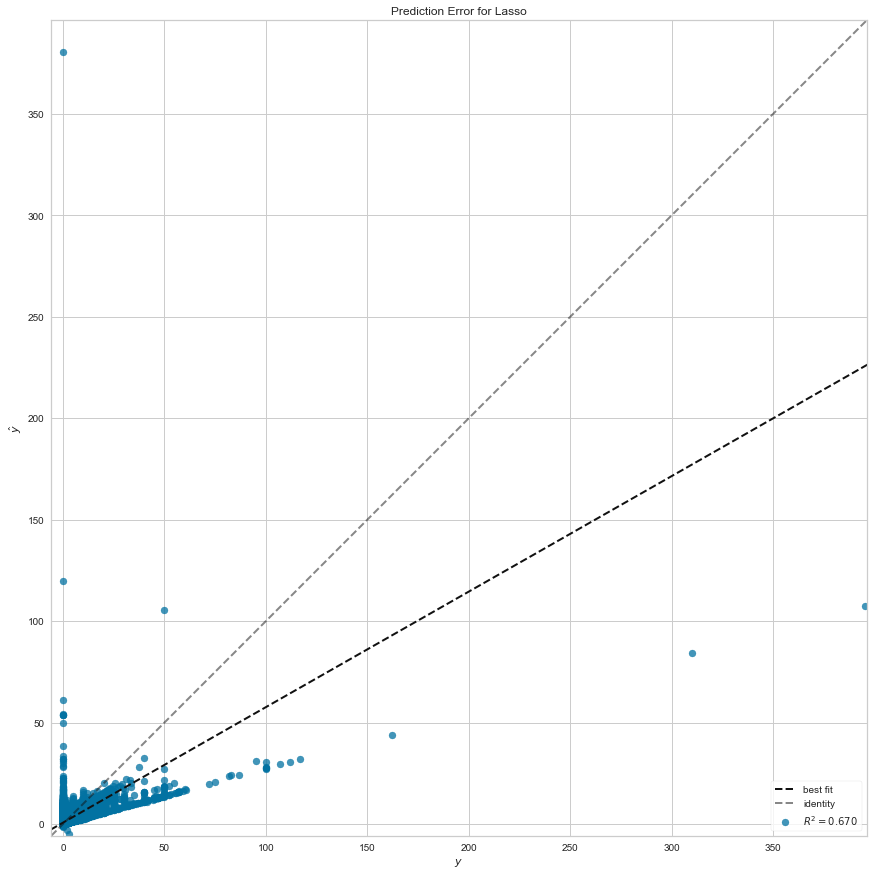

In [155]:
# PREDICTION ERROR GRAPH

# Instantiate the linear model and visualizer
model_pos = PredictionError(Lasso())

model_pos.fit(taxi_trips_pos_X_train, taxi_trips_pos_y_train)  # Fit the training data to the visualizer
model_pos.score(taxi_trips_pos_X_test, taxi_trips_pos_y_test)  # Evaluate the model on the test data
model_pos.show()                                             # Finalize and render the figure

<b>Analysis</b>:

Looking at the predicted values for the linear regression with all the positively correlated variables, we see that the predictions are very closely accurate. We can hence come to a conclusion that the positively correlated variables are directly proportional to the target variable. They are very closely related to the target variable (tips). An increase in the cost variables will definitely have an increase in the target variable and in the same way, a decrease in these variables will also show a decrease in the target variable.

## STEP 6: MODELLING AND PLOTTING THE LINEAR REGRESSION GRAPH


<b>R-squared:</b> R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

<b>Key Limitations of R-squared</b>

<p>R-squared cannot determine whether the coefficient estimates and predictions are biased.</p>

<p>R-squared does not indicate whether a regression model is adequate. You can have a low R-squared value for a good model, or a high R-squared value for a model that does not fit the data!</p>

<b>Are Low R-squared Values Inherently Bad?</b>

No! There are two major reasons why it can be just fine to have low R-squared values.

In some fields, it is entirely expected that the R-squared values will be low. For example, any field that attempts to predict human behavior, such as psychology, typically has R-squared values lower than 50%. Humans are simply harder to predict than, say, physical processes(here, giving tips).

Furthermore, if your R-squared value is low but you have statistically significant predictors, you can still draw important conclusions about how changes in the predictor values are associated with changes in the response value. Regardless of the R-squared, the significant coefficients still represent the mean change in the response for one unit of change in the predictor while holding other predictors in the model constant. Obviously, this type of information can be extremely valuable.

<b>1. Plotting the Regression graph for all the numerical variables.</b>


Coefficients:  [[0.00200759]]

Mean squared error: 2.28

Coefficient of determination(R-squared): 0.01


               Linear Regression plot for the all the numerical variables


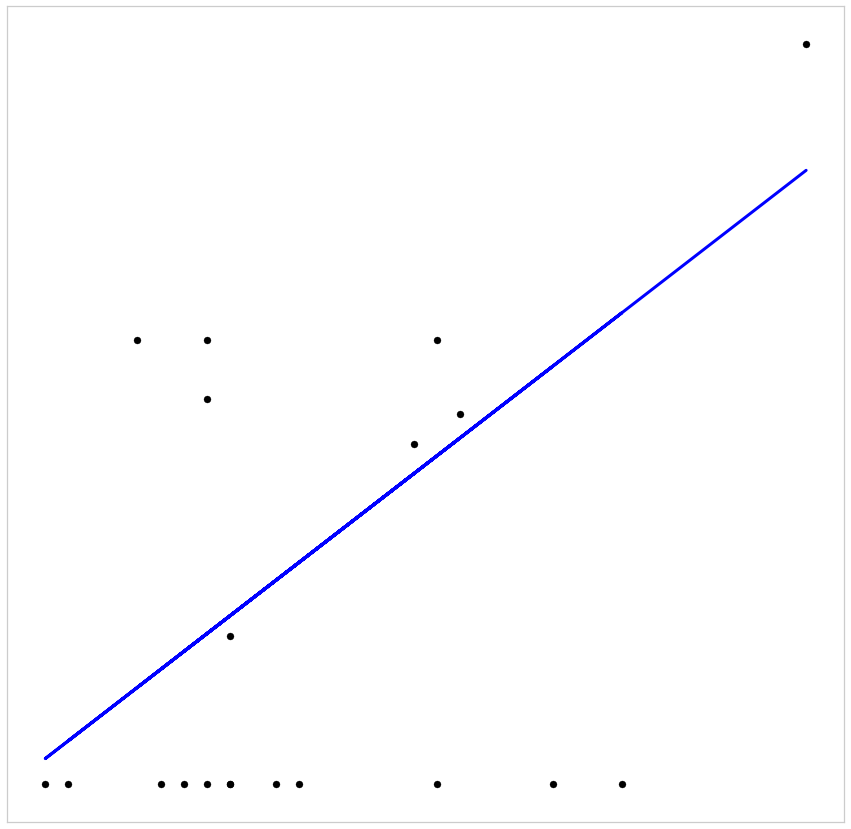

In [191]:
taxi_trips_num_2016_X = taxi_trips_2016_num.values
taxi_trips_num_2016_y = taxi_trips_2016['tips'].values.reshape(-1,1)

# Use only one feature
taxi_trips_num_2016_X = taxi_trips_num_2016_X[:, np.newaxis, 2]

# Split the data into training/testing sets
taxi_trips_num_2016_X_train = taxi_trips_num_2016_X[:-20]
taxi_trips_num_2016_X_test = taxi_trips_num_2016_X[-20:]

# Split the targets into training/testing sets
taxi_trips_num_2016_y_train = taxi_trips_num_2016_y[:-20]
taxi_trips_num_2016_y_test = taxi_trips_num_2016_y[-20:]

# Create linear regression object
regr_num1= linear_model.LinearRegression()

# Train the model using the training sets
regr_num1.fit(taxi_trips_num_2016_X_train, taxi_trips_num_2016_y_train)

# Make predictions using the testing set
taxi_trips_num_2016_y_pred = regr_num1.predict(taxi_trips_num_2016_X_test)

# The coefficients
print('\nCoefficients: ', regr_num1.coef_)
# The mean squared error
print('\nMean squared error: %.2f'
      % mean_squared_error(taxi_trips_num_2016_y_test, taxi_trips_num_2016_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('\nCoefficient of determination(R-squared): %.2f'
      % r2_score(taxi_trips_num_2016_y_test, taxi_trips_num_2016_y_pred))

# Plot outputs
print("\n\n               Linear Regression plot for the all the numerical variables")
plt.scatter(taxi_trips_num_2016_X_test, taxi_trips_num_2016_y_test,  color='black')
plt.plot(taxi_trips_num_2016_X_test, taxi_trips_num_2016_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

<b>2. Plotting the Regression graph for all the negatively correlated variables</b>


Coefficients:  [[-0.00053288]]

Mean squared error: 2.40

Coefficient of determination(R-squared): -0.04


               Linear Regression plot for all the negatively correlated variables


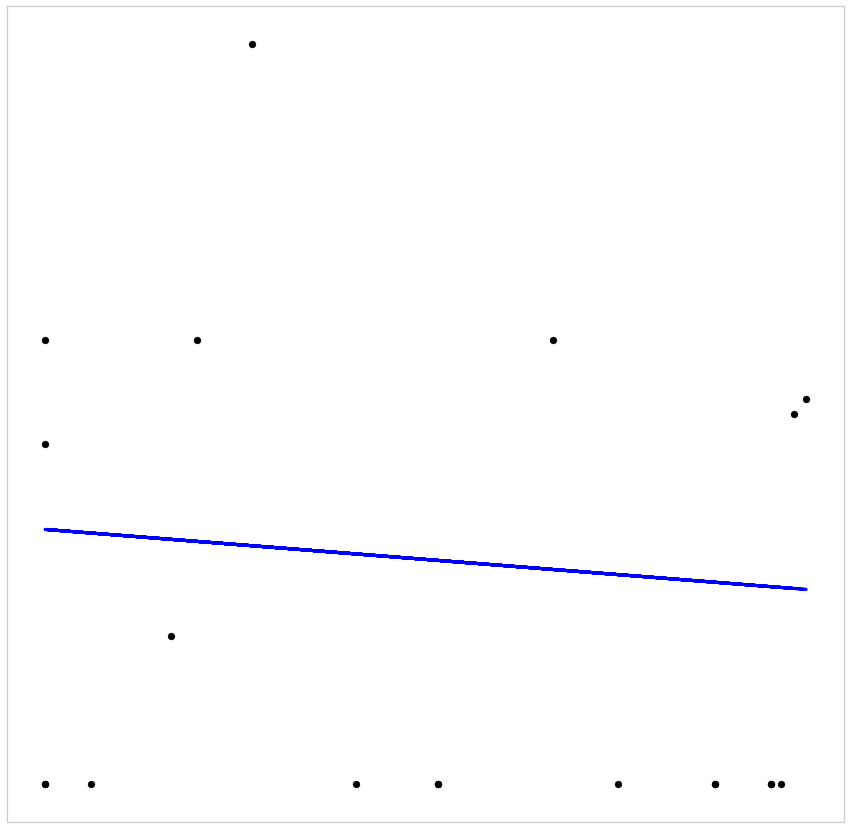

In [179]:
taxi_trips_neg_2016_X = neg_taxi_trips_2016.values
taxi_trips_neg_2016_y = taxi_trips_2016['tips'].values.reshape(-1,1)

# Use only one feature
taxi_trips_neg_2016_X = taxi_trips_neg_2016_X[:, np.newaxis, 2]

# Split the data into training/testing sets
taxi_trips_neg_2016_X_train = taxi_trips_neg_2016_X[:-20]
taxi_trips_neg_2016_X_test = taxi_trips_neg_2016_X[-20:]

# Split the targets into training/testing sets
taxi_trips_neg_2016_y_train = taxi_trips_neg_2016_y[:-20]
taxi_trips_neg_2016_y_test = taxi_trips_neg_2016_y[-20:]

# Create linear regression object
regr_neg1= linear_model.LinearRegression()

# Train the model using the training sets
regr_neg1.fit(taxi_trips_neg_2016_X_train, taxi_trips_neg_2016_y_train)

# Make predictions using the testing set
taxi_trips_neg_2016_y_pred = regr_neg1.predict(taxi_trips_neg_2016_X_test)

# The coefficients
print('\nCoefficients: ', regr_neg1.coef_)
# The mean squared error
print('\nMean squared error: %.2f'
      % mean_squared_error(taxi_trips_neg_2016_y_test, taxi_trips_neg_2016_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('\nCoefficient of determination(R-squared): %.2f'
      % r2_score(taxi_trips_neg_2016_y_test, taxi_trips_neg_2016_y_pred))

# Plot outputs
print("\n\n               Linear Regression plot for all the negatively correlated variables")
plt.scatter(taxi_trips_neg_2016_X_test, taxi_trips_neg_2016_y_test,  color='black')
plt.plot(taxi_trips_neg_2016_X_test, taxi_trips_neg_2016_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

<b>3. Plotting the Regression graph with only the variables related to the cost of the trip</b>


Coefficients:  [[0.03025912]]

Mean squared error: 1.91

Coefficient of determination (R-squared): 0.17


               Linear Regression plot for the variables related to the cost of the trip


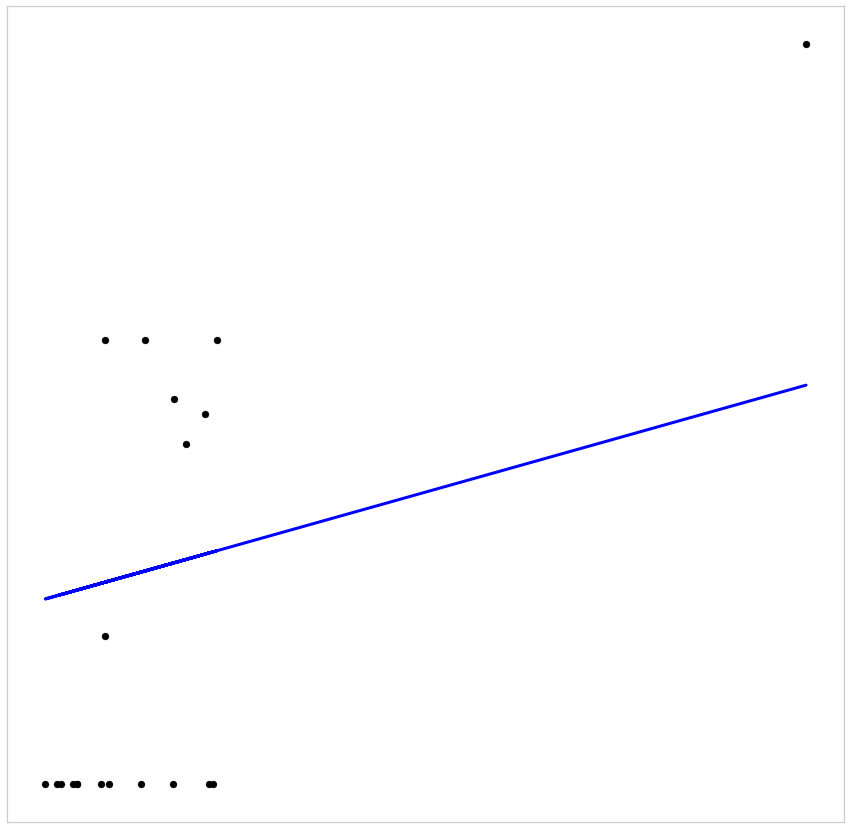

In [180]:
taxi_trips_cost_2016_X = cost_taxi_trips_2016.values
taxi_trips_cost_2016_y = taxi_trips_2016['tips'].values.reshape(-1,1)

# Use only one feature
taxi_trips_cost_2016_X = taxi_trips_cost_2016_X[:, np.newaxis, 2]

# Split the data into training/testing sets
taxi_trips_cost_2016_X_train = taxi_trips_cost_2016_X[:-20]
taxi_trips_cost_2016_X_test = taxi_trips_cost_2016_X[-20:]

# Split the targets into training/testing sets
taxi_trips_cost_2016_y_train = taxi_trips_cost_2016_y[:-20]
taxi_trips_cost_2016_y_test = taxi_trips_cost_2016_y[-20:]

# Create linear regression object
regr_cost1= linear_model.LinearRegression()

# Train the model using the training sets
regr_cost1.fit(taxi_trips_cost_2016_X_train, taxi_trips_cost_2016_y_train)

# Make predictions using the testing set
taxi_trips_cost_2016_y_pred = regr_cost1.predict(taxi_trips_cost_2016_X_test)

# The coefficients
print('\nCoefficients: ', regr_cost1.coef_)
# The mean squared error
print('\nMean squared error: %.2f'
      % mean_squared_error(taxi_trips_cost_2016_y_test, taxi_trips_cost_2016_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('\nCoefficient of determination (R-squared): %.2f'
      % r2_score(taxi_trips_cost_2016_y_test, taxi_trips_cost_2016_y_pred))

# Plot outputs
print("\n\n               Linear Regression plot for the variables related to the cost of the trip")
plt.scatter(taxi_trips_cost_2016_X_test, taxi_trips_cost_2016_y_test,  color='black')
plt.plot(taxi_trips_cost_2016_X_test, taxi_trips_cost_2016_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

<b>4. Plotting the Regression graph with the distance and duration variables</b>


Coefficients:  [[0.00200759]]

Mean squared error: 2.28

Coefficient of determination (R-squared): 0.01


               Linear Regression plot for the distance and duration variables


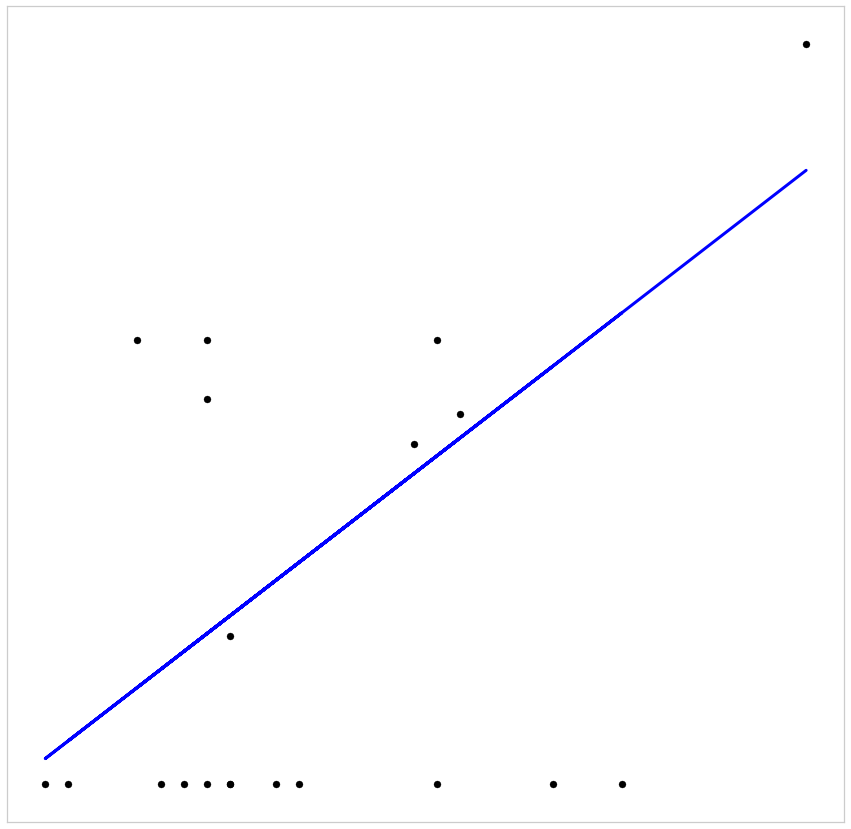

In [183]:
taxi_trips_dd_2016_X = dd_taxi_trips_2016.values
taxi_trips_dd_2016_y = taxi_trips_2016['tips'].values.reshape(-1,1)

# Use only one feature
taxi_trips_dd_2016_X = taxi_trips_dd_2016_X[:, np.newaxis, 1]

# Split the data into training/testing sets
taxi_trips_dd_2016_X_train = taxi_trips_dd_2016_X[:-20]
taxi_trips_dd_2016_X_test = taxi_trips_dd_2016_X[-20:]

# Split the targets into training/testing sets
taxi_trips_dd_2016_y_train = taxi_trips_dd_2016_y[:-20]
taxi_trips_dd_2016_y_test = taxi_trips_dd_2016_y[-20:]

# Create linear regression object
regr_dd1= linear_model.LinearRegression()

# Train the model using the training sets
regr_dd1.fit(taxi_trips_dd_2016_X_train, taxi_trips_dd_2016_y_train)

# Make predictions using the testing set
taxi_trips_dd_2016_y_pred = regr_dd1.predict(taxi_trips_dd_2016_X_test)

# The coefficients
print('\nCoefficients: ', regr_dd1.coef_)
# The mean squared error
print('\nMean squared error: %.2f'
      % mean_squared_error(taxi_trips_dd_2016_y_test, taxi_trips_dd_2016_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('\nCoefficient of determination (R-squared): %.2f'
      % r2_score(taxi_trips_dd_2016_y_test, taxi_trips_dd_2016_y_pred))

# Plot outputs
print("\n\n               Linear Regression plot for the distance and duration variables")
plt.scatter(taxi_trips_dd_2016_X_test, taxi_trips_dd_2016_y_test,  color='black')
plt.plot(taxi_trips_dd_2016_X_test, taxi_trips_dd_2016_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

<b>5. Plotting the Regression graph with the variables related to latitudes and longitudes</b>


Coefficients:  [[-0.0023203]]

Mean squared error: 2.52

Coefficient of determination (R-squared): -0.09


               Linear Regression plot for the variables related to latitudes and longitudes


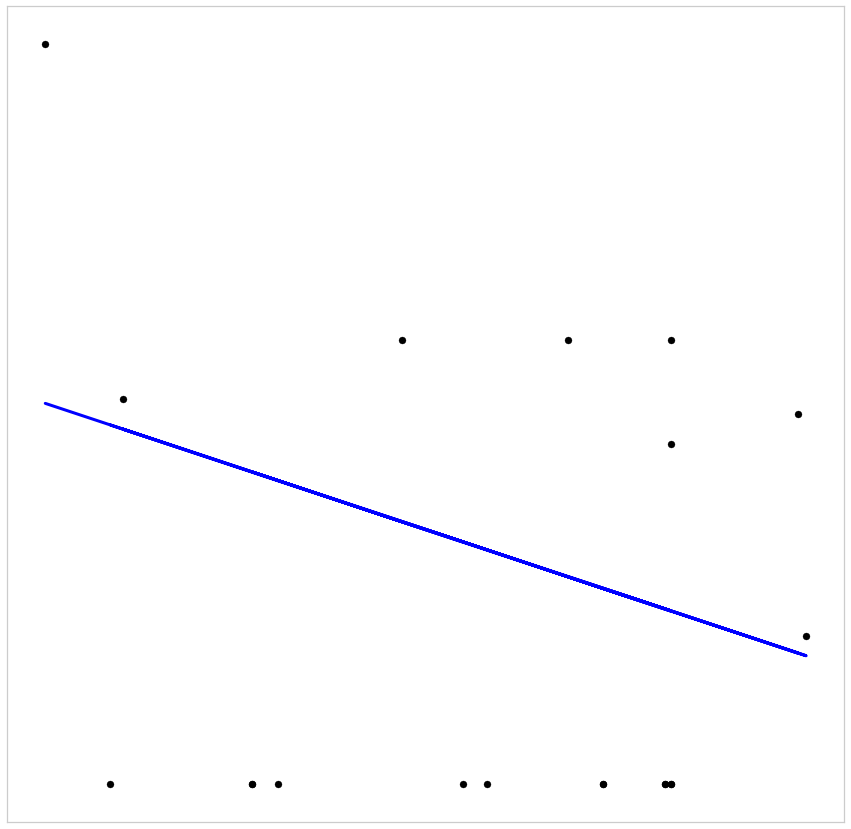

In [186]:
taxi_trips_ll_2016_X = ll_taxi_trips_2016.values
taxi_trips_ll_2016_y = taxi_trips_2016['tips'].values.reshape(-1,1)

# Use only one feature
taxi_trips_ll_2016_X = taxi_trips_ll_2016_X[:, np.newaxis, 1]

# Split the data into training/testing sets
taxi_trips_ll_2016_X_train = taxi_trips_ll_2016_X[:-20]
taxi_trips_ll_2016_X_test = taxi_trips_ll_2016_X[-20:]

# Split the targets into training/testing sets
taxi_trips_ll_2016_y_train = taxi_trips_ll_2016_y[:-20]
taxi_trips_ll_2016_y_test = taxi_trips_ll_2016_y[-20:]

# Create linear regression object
regr_ll1= linear_model.LinearRegression()

# Train the model using the training sets
regr_ll1.fit(taxi_trips_ll_2016_X_train, taxi_trips_ll_2016_y_train)

# Make predictions using the testing set
taxi_trips_ll_2016_y_pred = regr_ll1.predict(taxi_trips_ll_2016_X_test)

# The coefficients
print('\nCoefficients: ', regr_ll1.coef_)
# The mean squared error
print('\nMean squared error: %.2f'
      % mean_squared_error(taxi_trips_ll_2016_y_test, taxi_trips_ll_2016_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('\nCoefficient of determination (R-squared): %.2f'
      % r2_score(taxi_trips_ll_2016_y_test, taxi_trips_ll_2016_y_pred))

# Plot outputs
print("\n\n               Linear Regression plot for the variables related to latitudes and longitudes")
plt.scatter(taxi_trips_ll_2016_X_test, taxi_trips_ll_2016_y_test,  color='black')
plt.plot(taxi_trips_ll_2016_X_test, taxi_trips_ll_2016_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

<b>6. Plotting the Regression graph with the positively correlated variables</b>


Coefficients:  [[0.00200759]]

Mean squared error: 2.28

Coefficient of determination (R-squared): 0.01


               Linear Regression plot for the positively correlated variables


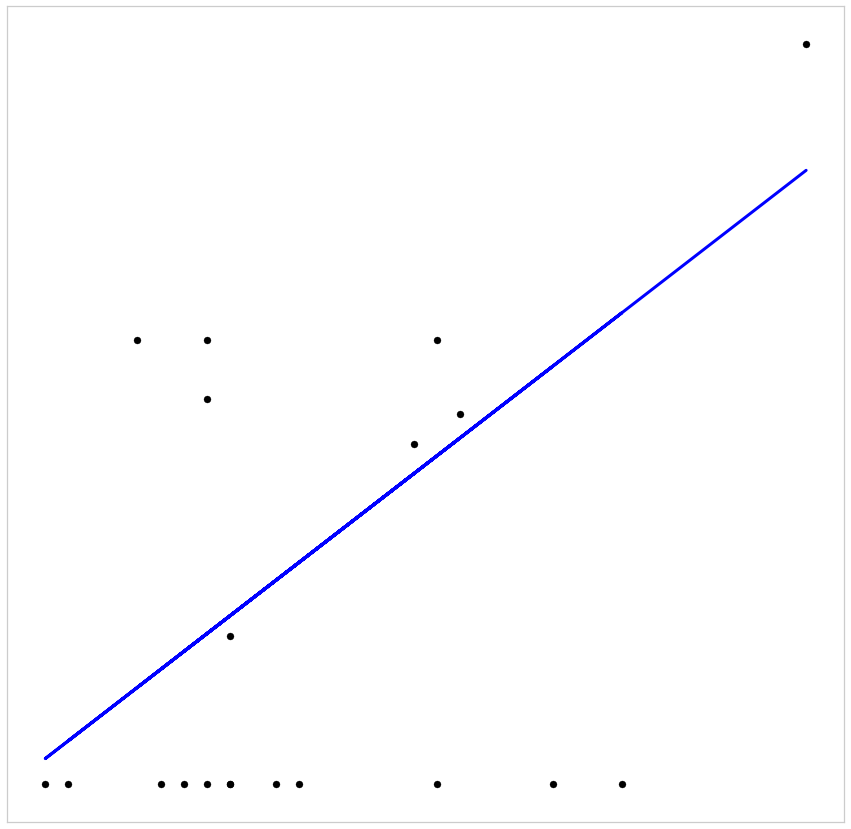

In [187]:
taxi_trips_pos_2016_X = pos_taxi_trips_2016.values
taxi_trips_pos_2016_y = taxi_trips_2016['tips'].values.reshape(-1,1)

# Use only one feature
taxi_trips_pos_2016_X = taxi_trips_pos_2016_X[:, np.newaxis, 1]

# Split the data into training/testing sets
taxi_trips_pos_2016_X_train = taxi_trips_pos_2016_X[:-20]
taxi_trips_pos_2016_X_test = taxi_trips_pos_2016_X[-20:]

# Split the targets into training/testing sets
taxi_trips_pos_2016_y_train = taxi_trips_pos_2016_y[:-20]
taxi_trips_pos_2016_y_test = taxi_trips_pos_2016_y[-20:]

# Create linear regression object
regr_pos1= linear_model.LinearRegression()

# Train the model using the training sets
regr_pos1.fit(taxi_trips_pos_2016_X_train, taxi_trips_pos_2016_y_train)

# Make predictions using the testing set
taxi_trips_pos_2016_y_pred = regr_pos1.predict(taxi_trips_pos_2016_X_test)

# The coefficients
print('\nCoefficients: ', regr_pos1.coef_)
# The mean squared error
print('\nMean squared error: %.2f'
      % mean_squared_error(taxi_trips_pos_2016_y_test, taxi_trips_pos_2016_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('\nCoefficient of determination (R-squared): %.2f'
      % r2_score(taxi_trips_pos_2016_y_test, taxi_trips_pos_2016_y_pred))

# Plot outputs
print("\n\n               Linear Regression plot for the positively correlated variables")
plt.scatter(taxi_trips_pos_2016_X_test, taxi_trips_pos_2016_y_test,  color='black')
plt.plot(taxi_trips_pos_2016_X_test, taxi_trips_pos_2016_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

<b>Analysis:</b>
    
Even though the calculated R-squared values are low, keeping in mind the limitations of R-squared, we can still conclude that the changes in the predictor values are associated with changes in the response value. 

## CONCLUSIONS

Based on these analysis, the possibilities of predicing the tips for a taxi ride depend mainly on the below mentioned factors:

1. Tips can be predicted using the below combinations: 
   <p>-fare, extras and trip_total</p>
   <p>-taxi_id, trip_seconds, trip_miles, pickup_community_area, dropoff_community_area, fare, extras, trip_total and        company</p>
   
   
2. While we have been able to improve the results, this may not be enough for the predictions as the customer reviews is not included. This is definitely a major factor in terms of considering whether to give a tip as it is a part of human behavior.

## RECOMMENDATIONS

1. Including the customer reviews for further analysis will be helpful to get more precise predictions as it is directly related to providing tips.

2. To improve the accuracy in the prediction we can try using different alogorithms as well